# Milestone 1

# Perkenalan

>- Nama      : Alsello Diveni Manuputty
>- Batch     : HCK 6 Pondok Indah
>- Phase     : 1
------
**Objective**
>Pada notebook ini akan dilakukan pengerjaan Milestone 1 fase 1 dimama akan dibuat model Classification untuk memprediksi `default_payment_next_month` menggunakan dataset dari `credit_card_default` BigQuery

# Query SQL

``````
SELECT       limit_balance,
  SAFE_CAST (sex AS INT64) AS sex,
  SAFE_CAST (education_level AS INT64) AS education_level,
  SAFE_CAST (marital_status AS INT64) AS marital_status,
             age, pay_0, pay_2, pay_3,pay_4, 
  SAFE_CAST (pay_5 AS FLOAT64) AS pay_5, 
  SAFE_CAST (pay_6 AS FLOAT64) AS pay_6, 
             bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, 
             bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, 
             pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
  SAFE_CAST (default_payment_next_month AS INT64) AS default_payment_next_month
FROM         `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT        11994
``````

# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

# Data Loading

In [2]:
# melihat semua kolom
pd.set_option('display.max_columns', None)

In [3]:
mentah = pd.read_csv('h8dsft_P1M1_AlselloDM.csv')
mentah.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [4]:
mentah.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [5]:
# melihat bentuk data
mentah.shape

(2965, 24)

In [6]:
# melihat info data
mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Dari data loading, terlihat bahwa datanya berjumlah 24 kolom dan 2965 baris. Semua data tidak memiliki null sehingga tidak perlu membersihkan missing value.

Berikut adalah deskripsi kolom dari bigquery yang akan memudahkan analisa.

- limit balance             : The limit balance of the amount of credit given in dollars (including individual and family / additional credit)
- sex                       : gender (1=male, 2=female)
- education_level           : education level/Education level (1 = Masters, 2 = University, 3 = High School, 4 = other, 5 = unknown, 6 = unknown)
- marital_status            : Marital status (1 = married, 2 = single, 3 = others)
- age                       : age or age in years
- pay_0                     : Payment status in September 2005 (-2 = revolving credit, -1 = pay duly, 0 = autodebit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, 9 = late payments for nine months and over)
- pay_2                     : Payment status in August 2005 (same scale as above)
- pay_3                     : Payment status in July 2005 (same scale as above)
- pay_4                     : Payment status in June 2005 (same scale as above)
- pay_5                     : Payment status in May 2005 (same scale as above)
- pay_6                     : Payment status in April 2005 (same scale as above)
- bill_amt_1                : Total bill for September 2005 (NT dollar)
- bill_amt_2                : Total bill for August 2005 (NT dollar)
- bill_amt_3                : Total bill for July 2005 (NT dollar)
- bill_amt_4                : Total bill for June 2005 (NT dollar)
- bill_amt_5                : Total bill for May 2005 (NT dollar)
- bill_amt_6                : Total bill for April 2005 (NT dollar)
- pay_amt_1                 : Amount of previous payment in September 2005 (NT dollars)
- pay_amt_2                 : Amount of previous payment in August 2005 (NT dollars)
- pay_amt_3                 : Amount of previous payment in July 2005 (NT dollars)
- pay_amt_4                 : Amount of previous payment in June 2005 (NT dollars)
- pay_amt_5                 : Amount of previous payment in May 2005 (NT dollars)
- pay_amt_6                 : Amount of previous payment in April 2005 (NT dollars)
- default_payment_next_month: default payment next month (1=yes, 0=no)

Karena nama kolom cukup membingungkan maka akan di rename nama-nama kolom ini untuk mudah dimengerti.

In [7]:
mentah.rename(columns={'pay_0': 'pay_sep', 'pay_2': 'pay_aug', 'pay_3': 'pay_jul',
                       'pay_4': 'pay_jun', 'pay_5': 'pay_may', 'pay_6': 'pay_apr',
                       'bill_amt_1': 'bill_amt_sep', 'bill_amt_2': 'bill_amt_aug', 'bill_amt_3': 'bill_amt_jul',
                       'bill_amt_4': 'bill_amt_jun', 'bill_amt_5': 'bill_amt_may', 'bill_amt_6': 'bill_amt_apr',
                       'pay_amt_1': 'pay_amt_sep', 'pay_amt_2': 'pay_amt_aug', 'pay_amt_3': 'pay_amt_jul',
                       'pay_amt_4': 'pay_amt_jun', 'pay_amt_5': 'pay_amt_may', 'pay_amt_6': 'pay_amt_apr'}, inplace=True)

# Data Cleaning

In [8]:
# overview data
df_clean = mentah.copy()
df_clean.head()

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0


In [9]:
df_clean[df_clean['pay_sep'] == 0]

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,70000.0,1,2,2,25.0,0.0,-1.0,-1.0,-1.0,-2.0,-2.0,34700.0,21597.0,3340.0,0.0,0.0,0.0,21597.0,3340.0,0.0,0.0,0.0,8535.0,0
2936,70000.0,2,2,1,53.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,24645.0,0.0,14000.0,0.0,0.0,0.0,0.0,14000.0,0.0,0.0,0.0,0.0,0
2937,280000.0,2,2,1,44.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,390.0,0.0,780.0,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,1
2938,120000.0,2,2,1,27.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,50620.0,15000.0,100.0,0.0,0.0,0.0,1000.0,100.0,0.0,0.0,0.0,0.0,0


In [10]:
# cek duplicates
df_clean[df_clean.duplicated()].shape

(1, 24)

In [11]:
df_clean[df_clean.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Jika dilihat dari data yang duplikat, disini ada data yang memiliki status pembayaran namun tidak memiliki angka spesifiknya. Menurut analis, data ini mungkin kurang input sehingga akan di drop saja.

In [12]:
# drop duplicates
df_clean.drop_duplicates(inplace=True)
df_clean.reset_index(drop = True,inplace= True)

# shape dataframe setelah drop duplicates
df_clean[df_clean.duplicated()].shape

(0, 24)

Selanjutnya akan diganti tipe data age menjadi integer untuk menghilangkan .0 di belakangnya

In [13]:
df_clean['age'] = df_clean['age'].astype(int)

Berhubung keseluruhan data sudah cukup bersih, maka untuk selanjutnya akan dilakukan EDA.

# Exploratory Data Analysis

In [14]:
df_eda = df_clean.copy()

Karena semua data sudah dalam representasi numerik, maka untuk melakukan EDA alangkah baiknya untuk digambarkan dengan plot. Data pertama yang akan divisualisasikan adalah data target.

<Axes: ylabel='default_payment_next_month'>

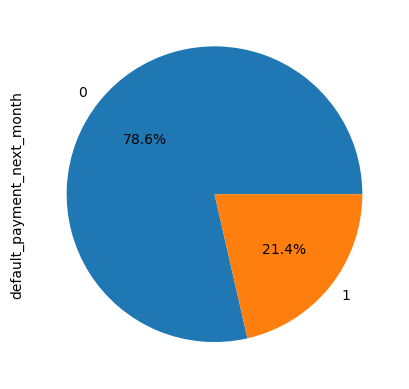

In [15]:
# visualisasi pie chart untuk target
df_eda['default_payment_next_month'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Dari visualisasi terlihat sangat jauh perbedaan antara nasabah yang melakukan pembayaran tagihan kartu kredit. Dengan angka 21.4%, nasabah yang melakukan pembayaran sangat sedikit juka dibandingkan dengan yang tidak membayarnya. Berdasarkan visualisasi sederhana ini saja sudah terlihat dengan mudah bahwa terdapat masalah di bagian `Collection` bank ini. Karena dengan sistem penagihan yang tepat, nasabah akan melakukan pembayaran. Nasabah yang tidak melakukan pembayaran baik bagi bank karena menambah jumlah bunga. Namun, jika bunga terus membesar, akan semakin dikit nasabah yang akan melakukan pembayaran.

In [16]:
# list kolom
df_col = df_eda.columns.tolist()
df_col

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_sep',
 'pay_aug',
 'pay_jul',
 'pay_jun',
 'pay_may',
 'pay_apr',
 'bill_amt_sep',
 'bill_amt_aug',
 'bill_amt_jul',
 'bill_amt_jun',
 'bill_amt_may',
 'bill_amt_apr',
 'pay_amt_sep',
 'pay_amt_aug',
 'pay_amt_jul',
 'pay_amt_jun',
 'pay_amt_may',
 'pay_amt_apr',
 'default_payment_next_month']

In [17]:
def plot_dist(df_eda, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

     # histogram
    sns.histplot(df_eda[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_eda[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_eda[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()


     # boxplot
    sns.boxplot(y=df_eda[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df_eda[col].name + ' Kurtosis: ' + str(df_eda[col].kurt()))
    print(df_eda[col].name + ' Skewness: ' + str(df_eda[col].skew()))
    if -0.5 <= df_eda[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_eda[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_eda[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

    print(df_eda[col].mean())
    print(df_eda[col].median())
    print(df_eda[col].mode())


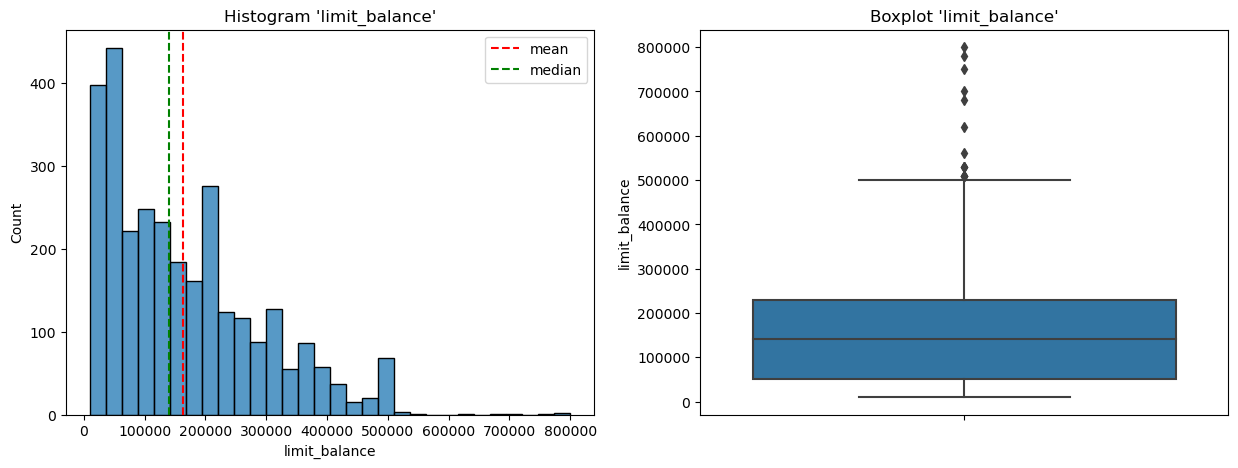

limit_balance Kurtosis: 0.6996887055637573
limit_balance Skewness: 1.0006047564306488
Columns 'limit_balance' right skewed
163356.95006747637
140000.0
0    50000.0
Name: limit_balance, dtype: float64


In [18]:
# plot limit balance
plot_dist(df_eda, df_col[0])

>```Plot pertama yang dilihat adalah plot limit_balance. Dari histogram, untuk data limit_balance persebarannya terlihat right skew. Dengan meannya 163356 dan mediannya 140000. Dari boxplot nya terlihat bahwa angka diatas 500000 dianggap outlier.```

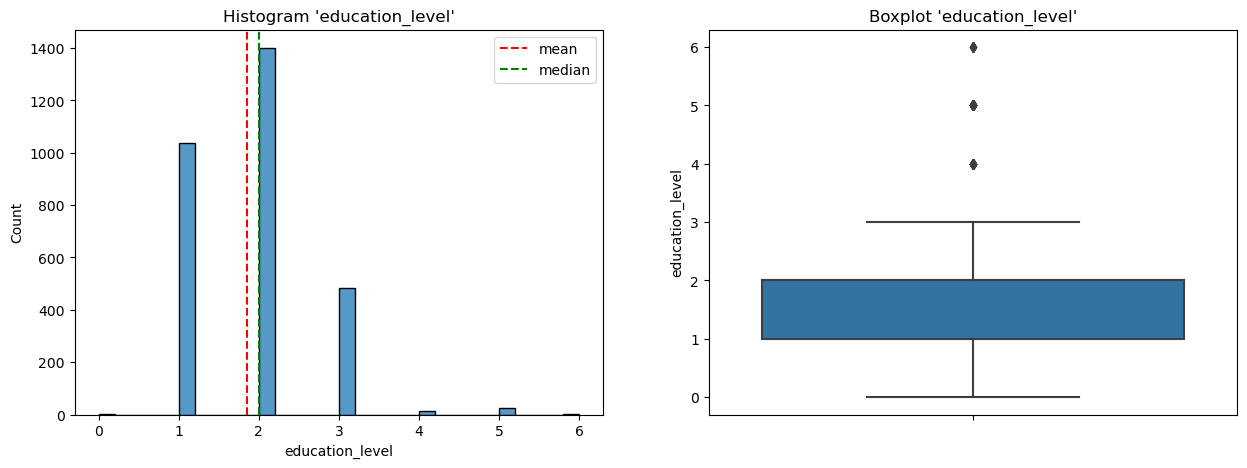

education_level Kurtosis: 1.8285485803506116
education_level Skewness: 0.8995997809081094
Columns 'education_level' right skewed
1.8498650472334683
2.0
0    2
Name: education_level, dtype: int64


In [19]:
# plot education level
plot_dist(df_eda, df_col[2])

In [20]:
sns.set_palette("Blues")

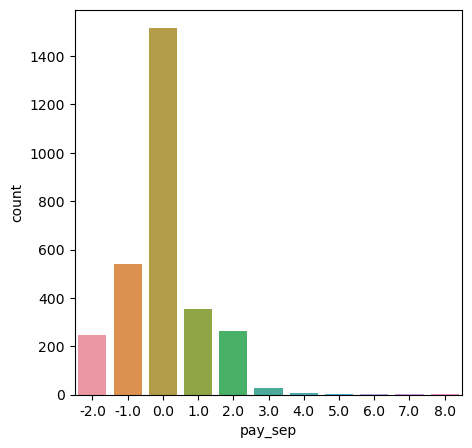

In [21]:
fig,axs=plt.subplots(figsize=(5,5))
sns.countplot(data=df_eda, x='pay_sep')

plt.show()

In [22]:
pd.DataFrame(df_eda.pay_sep.value_counts())

,pay_sep
0.0,1516
-1.0,540
1.0,355
2.0,262
-2.0,247
3.0,29
4.0,7
8.0,3
5.0,2
7.0,2


<Axes: xlabel='education_level'>

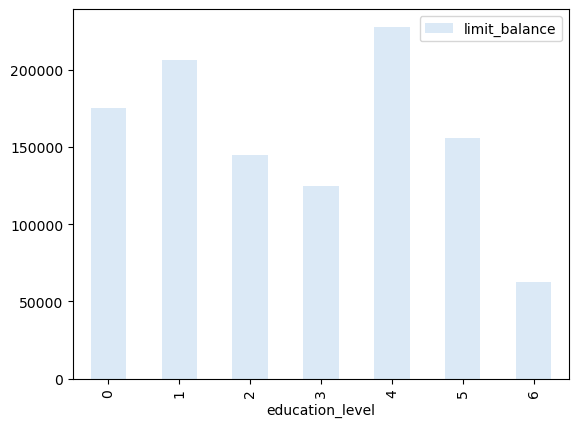

In [23]:
df_eda.groupby(by='education_level')[['limit_balance']].mean().plot(kind='bar')

Karena data education_level memiliki data kategori 4,5, dan 6 yang tidak jelas deskripsinya maka akan disatukan dengan data yang memiliki nilai mean yang sama secara limit balance nya. Karena asumsinya adalah untuk semakin tingginya education_level maka secara pekerjaan atau sumber mata pencahariannya juga semakin tinggi pendapatannya sehingga bisa transaksi dengan jumlah uang yang lebih banyak.

In [24]:
# replace menjadi kategori yang sesuai
df_eda['education_level'] = df_eda['education_level'].replace([0,4], 1)

In [25]:
# replace menjadi kategori yang sesuai
df_eda['education_level'] = df_eda['education_level'].replace([5], 2)

In [26]:
# replace menjadi kategori yang sesuai
df_eda['education_level'] = df_eda['education_level'].replace([6], 3)

In [27]:
# cek kembali
df_eda['education_level'].unique()

array([3, 1, 2], dtype=int64)

>`````Plot kedua yang dilihat adalah plot target. Dari histogram, untuk data education_level persebarannya terlihat right skew. Dengan data terbanyak berada di kelas 2 yaitu kelas university.`````

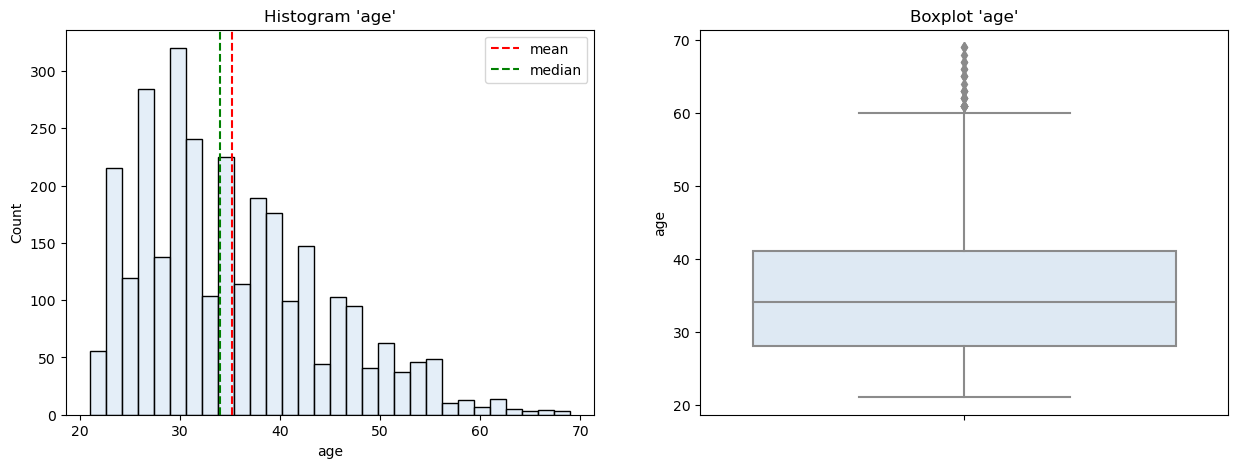

age Kurtosis: 0.08182141850804969
age Skewness: 0.7726317877077615
Columns 'age' right skewed
35.19365721997301
34.0
0    30
Name: age, dtype: int32


In [28]:
# plot age
plot_dist(df_eda, df_col[4])

>```Untuk persebaran data di kolom age, sama seperti sebelumnya terlihat right skewed. Dengan nasabah terbanyak di umur 30 dan untuk nasabah diatas umur 60 dianggap outlier.```

<Axes: xlabel='marital_status'>

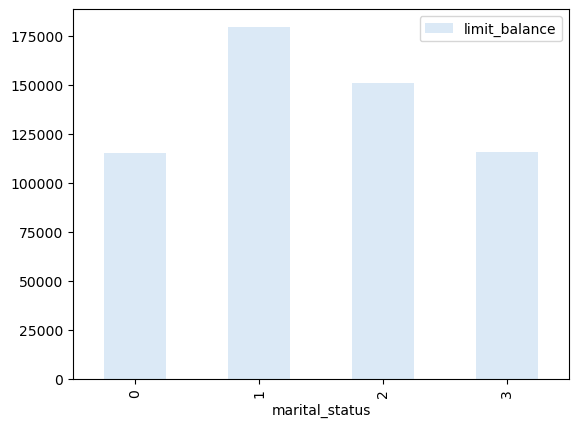

In [29]:
df_eda.groupby(by='marital_status')[['limit_balance']].mean().plot(kind='bar')

Berdasarkan visualisasi antara marital_status dan limit_balance, terlihat bahwa kategori 1 di marital_status yaitu married memiliki jumlah limit_balance tertinggi. Hal ini bisa disebabkan karena untuk orang yang sudah menikah, pengeluaran akan lebih banyak karena harus mengeluarkan uang untuk keluarga, keperluan rumah tangga, biaya konsumsi anak, sekolah, tagihan rumah, dan lain-lain. Kelas kedua yang tertinggi pengeluarannya adalah kelas 2 atau single. Disini bisa diasumsikan pengeluaran bagi orang yang single cukup banyak karena lebih untuk memuaskan nafsunya. Mulai dari hobi seperti otomotif, kuliner, travelling, hingga fashion kekinian. Selanjutnya diikuti oleh kelas 3 dan 0 yang analis asumsikan sebagai cerai, atau kondisi lainnya.

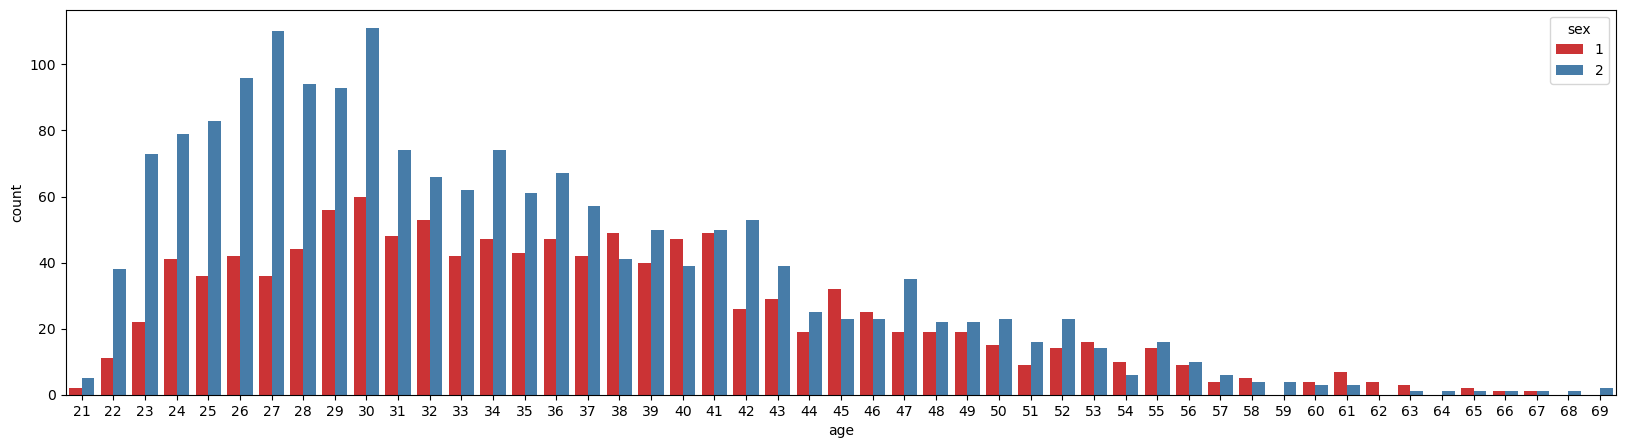

In [30]:
# visualisasi umur nasabah

plt.figure(figsize=(20, 5))
sns.countplot(data=df_eda, x='age', hue='sex',palette='Set1')
plt.show()

Untuk visualisasi data umur dan jenis kelamin nasabah, terlihat bahwa data tertinggi terdapat di umur 27 dan 30. Berdasarkan jenis kelaminnya, nasabah terbanyak adalah nasabah laki-laki. Hal ini mungkin disebabkan karena laki-laki umumnya menjadi tulang punggung keluarga dan sumber penghasilan. Oleh karena itu persebaran datanya menjadi seperti ini.

Karena sepertinya datanya berhubungan, selanjutnya akan dicoba untuk melihat hubungan antara bill_amt dan pay_amt.

In [31]:
# define fungsi visualisasi scatterplot
def plot_scat(df_eda, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12):
    fig, axes = plt.subplots(ncols=2,nrows = 3 ,figsize=(18, 18))

    axes[0,0].scatter(x=df_eda[col1], y=df_eda[col2], c='b', s=1)
    axes[0,0].set_title(f"Scatterplot '{col1}' vs '{col2}'", fontsize=10)
    axes[0,0].set_xlabel(col1)
    axes[0,0].set_ylabel(col2)
   
    axes[0,1].scatter(x=df_eda[col3], y=df_eda[col4], c='g', s=1)
    axes[0,1].set_title(f"Scatterplot '{col3}' vs '{col4}'", fontsize=10)
    axes[0,1].set_xlabel(col3)
    axes[0,1].set_ylabel(col4)

    axes[1,0].scatter(x=df_eda[col5], y=df_eda[col6], c='r', s=1)
    axes[1,0].set_title(f"Scatterplot '{col5}' vs '{col6}'", fontsize=10)
    axes[1,0].set_xlabel(col5)
    axes[1,0].set_ylabel(col6)
   
    axes[1,1].scatter(x=df_eda[col7], y=df_eda[col8], c='c', s=1)
    axes[1,1].set_title(f"Scatterplot '{col7}' vs '{col8}'", fontsize=10)
    axes[1,1].set_xlabel(col7)
    axes[1,1].set_ylabel(col8)

    axes[2,0].scatter(x=df_eda[col9], y=df_eda[col10], c='m', s=1)
    axes[2,0].set_title(f"Scatterplot '{col9}' vs '{col10}'", fontsize=10)
    axes[2,0].set_xlabel(col9)
    axes[2,0].set_ylabel(col10)
   
    axes[2,1].scatter(x=df_eda[col11], y=df_eda[col12], c='y', s=1)
    axes[2,1].set_title(f"Scatterplot '{col11}' vs '{col12}'", fontsize=10)
    axes[2,1].set_xlabel(col11)
    axes[2,1].set_ylabel(col12)

    plt.show()

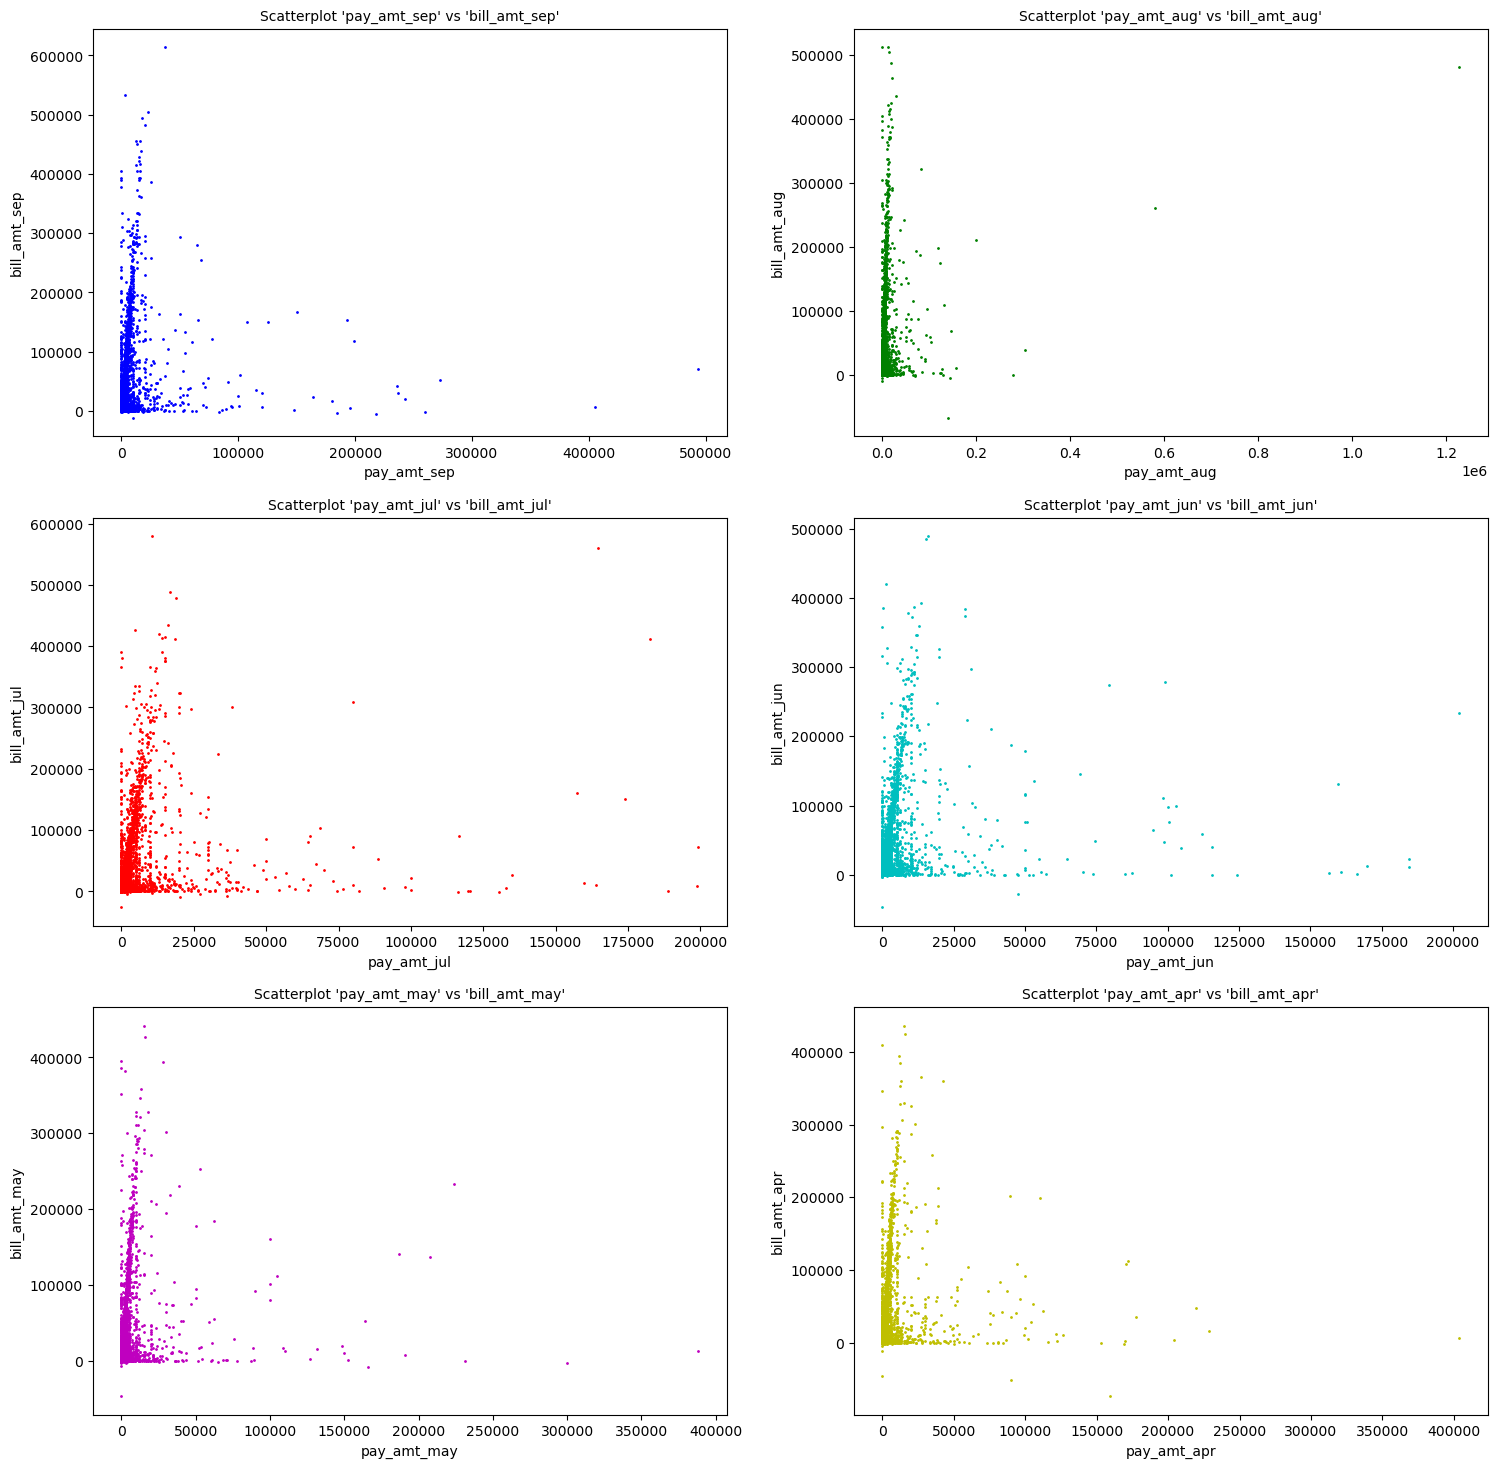

In [32]:
plot_scat(df_eda, df_col[-7], df_col[11],df_col[-6],
          df_col[12],df_col[-5],df_col[13],df_col[-4],
          df_col[14],df_col[-3],df_col[15],df_col[-2],df_col[16])

Dari scatterplot, terlihat bahwa hubungan antara jumlah pembayaran dan jumlah tagihan memiliki hubungan linear yang sedikit positif. Hal ini menunjukan bahwa keduanya memang berhubungan satu sama lain. Hal lain yang juga terlihat dari visualisasi adalah terdapat banyak outlier dari data. Hal ini dapat mempengaruhi hasil prediksi model. Oleh karena itu, nantinya akan di handle outliernya setelah sudah ditentukan fitur-fitur yang diinginkan supaya tidak terlalu banyak data yang terbuang.

# Feature Relationships

Karena data belum jelas mana saja yang penting atau tidak, maka akan segera dilakukan feature relationships untuk cek korelasinya terhadap target.Untuk ini akan dilakukan splitting data train dan test dahulu lalu selanjutnya di split lagi antara numerikal dan kategorikal.

In [33]:
df_eda.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
       'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
       'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug',
       'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr',
       'default_payment_next_month'],
      dtype='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_num = df_eda[['limit_balance', 'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr',
       'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
       'bill_amt_may', 'bill_amt_apr', 'pay_amt_sep', 'pay_amt_aug',
       'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']]

def calc_vif(X):

    # hitung VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
calc_vif(data_num)

,variables,VIF
0,limit_balance,2.563636
1,pay_sep,1.879938
2,pay_aug,3.250731
3,pay_jul,3.517935
4,pay_jun,4.187164
5,pay_may,4.983731
6,pay_apr,3.354147
7,bill_amt_sep,24.333455
8,bill_amt_aug,39.847255
9,bill_amt_jul,27.541702


Setelah dicek multi-colinearity, ternyata kolom-kolom bill_amt memiliki skor VIF yang tinggi. Untuk saat ini masih belum akan di drop. Karena masih  belum tahu korelasinya dengan prediksi data target.

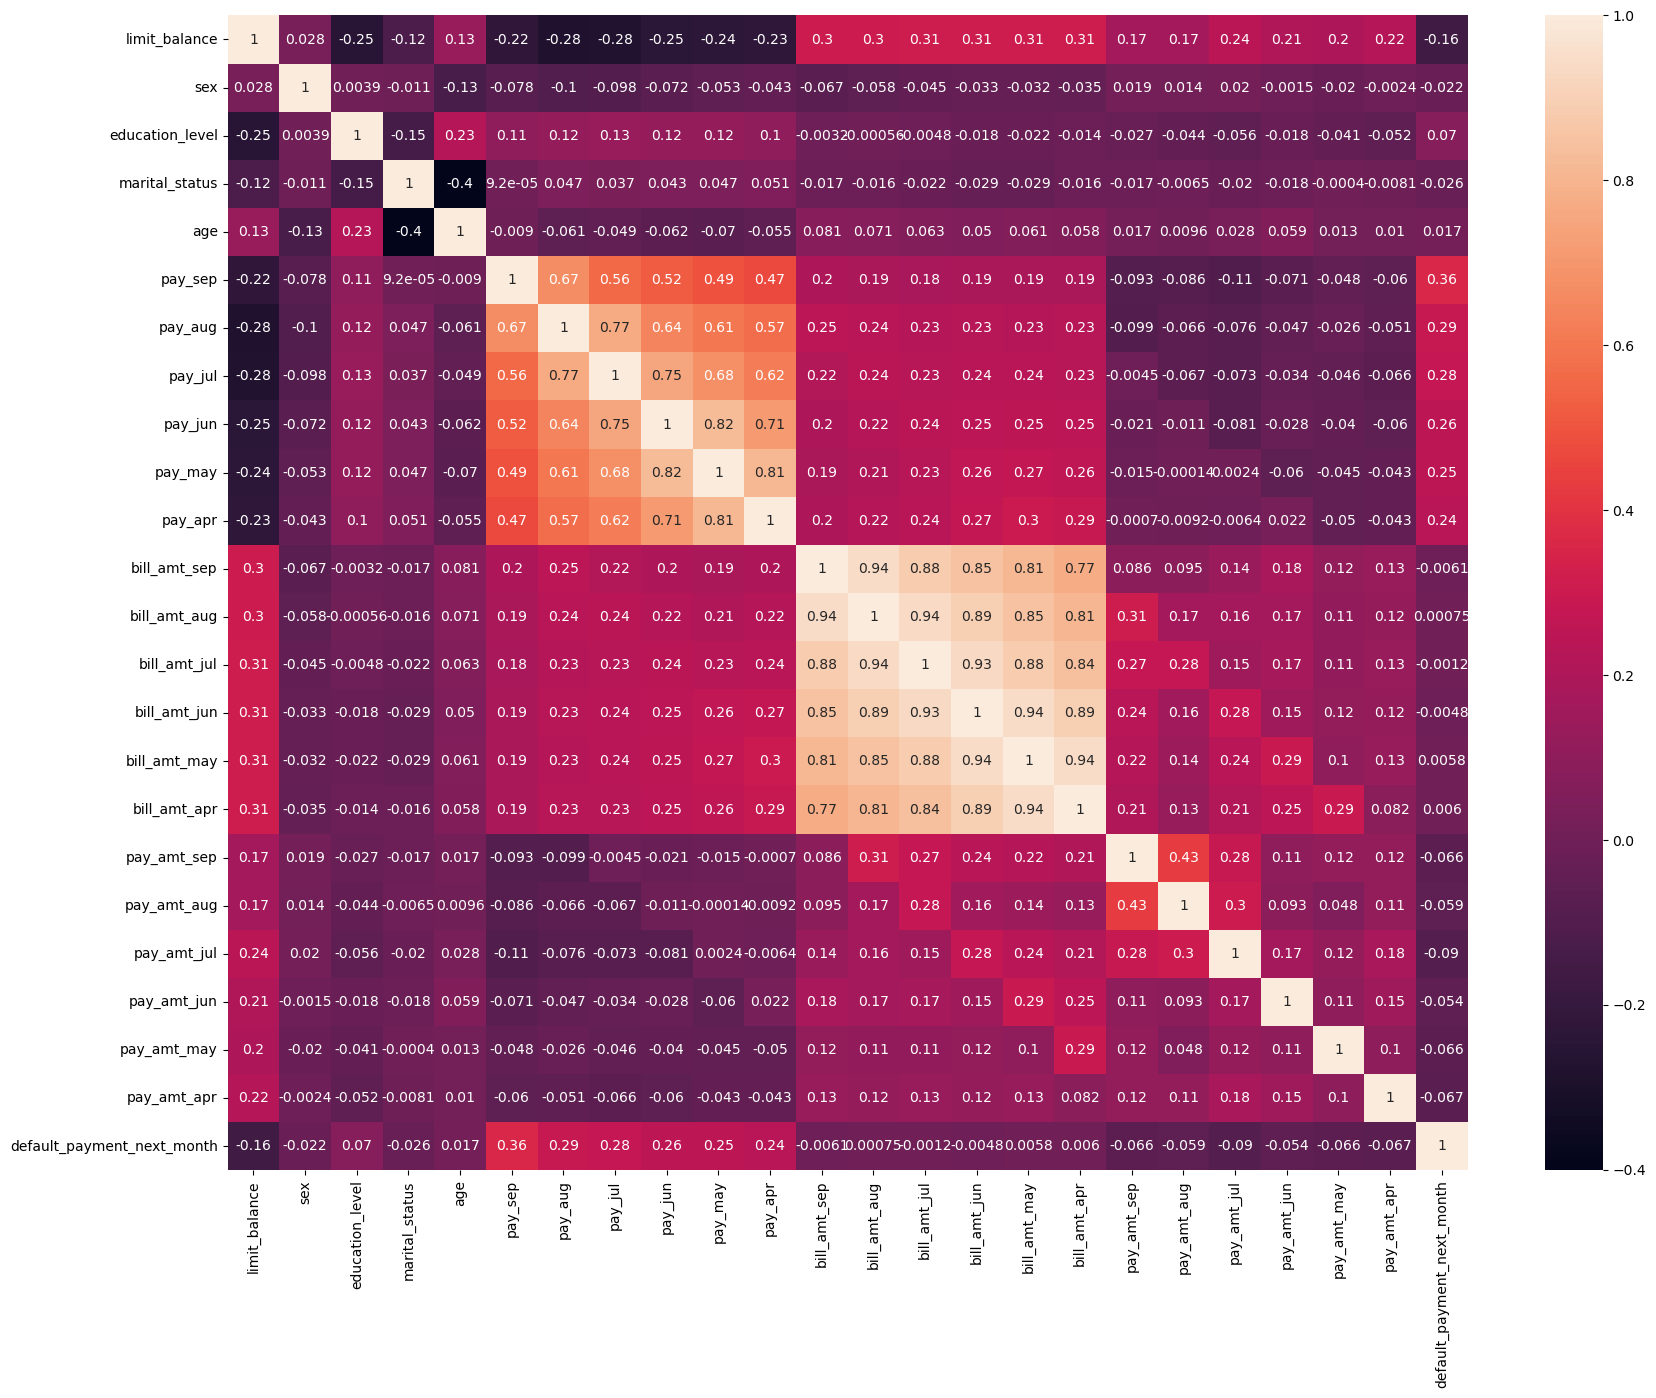

In [36]:
# cek korelasi fitur dan target
plt.figure(figsize=(20,15))
sns.heatmap(df_eda.corr(), annot=True)
plt.show()

Untuk semua fitur-fitur ini terlihat untuk fitur pay adalah yang paling berpengaruh pada klasifikasi target. Karena menurut saya variasi data historiknya untuk fitur masih kurang, maka akan digunakan model klasifikasi dan memanfaatkan atribut feature_importances untuk mendapatkan variasi lain yang lebih pasti.

# Feature Engineering

## Feature Selection

Diperlukan data lebih yang dapat menafsirkan behaviour nasabah dalam melakukan pembayaran. Dari pendapat ini, saya memutuskan untuk membuat kolom fitur baru berisikan rank dari kebiasaan masing-masing nasabah dalam melakukan pembayaran.

Untuk rank nya akan meliputi :
- 6 = Nasabah yang melakukan pembayaran dari bulan April hingga September tanpa absen.
- 5 = Nasabah yang melakukan pembayaran dari bulan May hingga September tanpa absen.
- 4 = Nasabah yang melakukan pembayaran dari bulan June hingga September tanpa absen.
- 3 = Nasabah yang melakukan pembayaran dari bulan July hingga September tanpa absen.
- 2 = Nasabah yang melakukan pembayaran dari bulan August hingga September tanpa absen.
- 1 = Nasabah yang hanya melakukan pembayaran pada bulan September.
- 0 = Nasabah yang tidak melakukan transaksi selama 6 bulan.

Kolom baru ini hanya untuk menambah sudut pandang baru sekaligus menjadi wakil dari kolom-kolom yang di drop untuk tetap bersuara. Khususnya kolom-kolom pay_amt. Karena data pay_amt ingin menjelaskan kebiasaan customer dalam melakukan pembayaran. Untuk nominalnya berapa, saya berpendapat bahwa data itu hanya berguna jika ingin melakukan analisa ekonomi.

In [37]:
# buat kolom df_eda jadi 0
df_eda['customer_score'] = 0

# iterasi tiap baris
for i in range(len(df_eda)):
    skor = 0
    restart_count = False
    
    # iterasi sesuai urutan bulan
    for col in ['pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr']:
        if df_eda[col][i] == 0:
            restart_count = True
        if not restart_count:
            skor += 1

    # masukan kedalam kolom customer_score
    df_eda.loc[i, 'customer_score'] = skor



In [38]:
df_eda

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month,customer_score
0,80000.0,1,3,1,54,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1,6
1,200000.0,1,1,1,49,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0,6
2,20000.0,2,3,2,22,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1,3
3,260000.0,2,1,2,33,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0,6
4,150000.0,1,1,2,32,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,80000.0,2,3,2,28,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0,1
2960,50000.0,2,3,1,51,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1,2
2961,450000.0,2,2,1,38,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1,6
2962,50000.0,2,2,1,44,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0,4


Setelah ditambahkan kolom baru ini, selanjutnya akan dicoba untuk divisualisasikan agar terbayang tipe nasabah kita seperti apa.

<Axes: xlabel='customer_score', ylabel='count'>

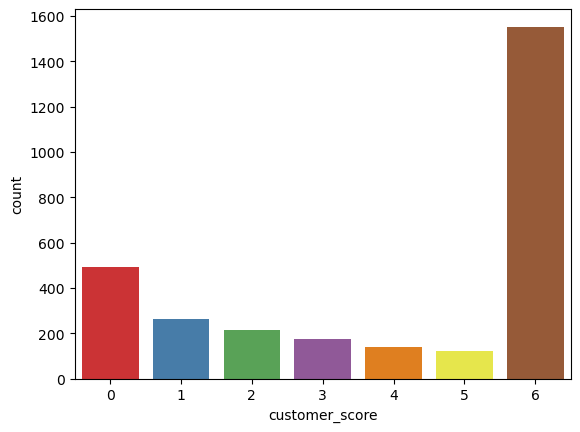

In [39]:
sns.countplot(data=df_eda, x='customer_score',palette='Set1')

Selanjutnya sebelum data splitting akan diambil data inference dahulu supaya tidak merepotkan

In [40]:
# ambil data inference
inf = df_eda.sample(10, random_state=30) 
inf 

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month,customer_score
1002,70000.0,2,2,1,47,0.0,0.0,0.0,0.0,0.0,-2.0,136809.0,118811.0,52953.0,53696.0,11790.0,12045.0,3158.0,10000.0,2446.0,11790.0,430.0,423.0,0,6
2511,150000.0,2,1,1,28,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,58322.0,36865.0,32311.0,12791.0,390.0,1508.0,36865.0,32311.0,12956.0,390.0,1508.0,2224.0,0,6
1050,90000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,2.0,63426.0,57922.0,55010.0,52540.0,56236.0,40922.0,2700.0,2500.0,1900.0,4600.0,0.0,1600.0,1,4
1291,80000.0,2,3,2,65,2.0,0.0,0.0,0.0,0.0,0.0,85882.0,84985.0,84247.0,81619.0,30095.0,20639.0,3900.0,4000.0,2048.0,1300.0,1700.0,401.0,0,6
1696,260000.0,2,2,2,29,-2.0,-2.0,-1.0,0.0,0.0,-1.0,-5.0,-5.0,9571.0,7235.0,0.0,197.0,0.0,9576.0,29.0,0.0,197.0,568.0,0,0
2905,20000.0,1,3,1,28,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
804,90000.0,2,2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,19204.0,12681.0,14155.0,14916.0,15673.0,17404.0,2000.0,2000.0,1000.0,1000.0,2000.0,2000.0,0,6
957,50000.0,1,2,1,42,0.0,0.0,0.0,0.0,0.0,2.0,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0,4
999,500000.0,1,2,1,40,0.0,0.0,0.0,0.0,0.0,-2.0,30415.0,31645.0,32556.0,36642.0,-8.0,-8.0,2006.0,3000.0,5080.0,8.0,0.0,0.0,0,4
1022,310000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,0.0,304991.0,311243.0,306314.0,258610.0,246491.0,198889.0,13019.0,11128.0,8407.0,8599.0,6833.0,5987.0,1,6


In [41]:
# drop inference dari dataset

df_eda = df_eda.drop(inf.index)
df_eda

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month,customer_score
0,80000.0,1,3,1,54,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1,6
1,200000.0,1,1,1,49,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0,6
2,20000.0,2,3,2,22,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1,3
3,260000.0,2,1,2,33,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0,6
4,150000.0,1,1,2,32,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,80000.0,2,3,2,28,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0,1
2960,50000.0,2,3,1,51,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1,2
2961,450000.0,2,2,1,38,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1,6
2962,50000.0,2,2,1,44,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0,4


In [42]:
# reset index

df_eda.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)
inf

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month,customer_score
0,70000.0,2,2,1,47,0.0,0.0,0.0,0.0,0.0,-2.0,136809.0,118811.0,52953.0,53696.0,11790.0,12045.0,3158.0,10000.0,2446.0,11790.0,430.0,423.0,0,6
1,150000.0,2,1,1,28,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,58322.0,36865.0,32311.0,12791.0,390.0,1508.0,36865.0,32311.0,12956.0,390.0,1508.0,2224.0,0,6
2,90000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,2.0,63426.0,57922.0,55010.0,52540.0,56236.0,40922.0,2700.0,2500.0,1900.0,4600.0,0.0,1600.0,1,4
3,80000.0,2,3,2,65,2.0,0.0,0.0,0.0,0.0,0.0,85882.0,84985.0,84247.0,81619.0,30095.0,20639.0,3900.0,4000.0,2048.0,1300.0,1700.0,401.0,0,6
4,260000.0,2,2,2,29,-2.0,-2.0,-1.0,0.0,0.0,-1.0,-5.0,-5.0,9571.0,7235.0,0.0,197.0,0.0,9576.0,29.0,0.0,197.0,568.0,0,0
5,20000.0,1,3,1,28,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,90000.0,2,2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,19204.0,12681.0,14155.0,14916.0,15673.0,17404.0,2000.0,2000.0,1000.0,1000.0,2000.0,2000.0,0,6
7,50000.0,1,2,1,42,0.0,0.0,0.0,0.0,0.0,2.0,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0,4
8,500000.0,1,2,1,40,0.0,0.0,0.0,0.0,0.0,-2.0,30415.0,31645.0,32556.0,36642.0,-8.0,-8.0,2006.0,3000.0,5080.0,8.0,0.0,0.0,0,4
9,310000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,0.0,304991.0,311243.0,306314.0,258610.0,246491.0,198889.0,13019.0,11128.0,8407.0,8599.0,6833.0,5987.0,1,6


Setelah diambil data inference dan sudah di reset index, proeses setelahnya adalah splitting data

In [43]:
# split
X = df_eda.drop('default_payment_next_month', axis=1)
y = df_eda.default_payment_next_month

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2363, 24)
(591, 24)
(2363,)
(591,)


Dari EDA, saya sudah menyampaikan bahwa analisa corr masih belum cukup untuk feature selection. Oleh karena itu, akan digunakan model klasifikasi yang memiliki atribut feature_importances. Untuk model klasifikasi yang digunakan adalah `Random Forest`. Pemilihan penggunaannya didasari oleh domain knowledge saya tentang model. Model-model yang memiliki atribut feature_importances meliputi : 

- Random Forest Classifier
- Gradient Boosting Classifier
- Extra Trees Classifier
- Decision Tree Classifier

Dari list model diatas, yang menurut saya cocok adalah Random Forest. Hal ini dikarenakan jika dibandingkan dengan model Decision Tree, Random Forest adalah Ensemble Model yang menggabungkan beberapa Decision Tree untuk klasifikasinya. Random Forest juga dapat menganalisa data dengan dimensi lebih banyak dan karena Random Forest adalah Ensemble Model, Random Forest dapat memberikan generalisasi yang lebih baik tanpa membuat analisa menjadi Overfit.


In [44]:
# Feature Selection dengan classifier
fs = RandomForestClassifier(n_estimators=100, random_state=5)
fs.fit(X_train, y_train)

# melihat nilai score hasil training untuk masing-masing fitur
score_Feature = pd.Series(fs.feature_importances_, index=X_train.columns).sort_values(ascending=False)
score_Feature

pay_sep            0.108273
age                0.058294
limit_balance      0.057332
bill_amt_sep       0.050688
pay_amt_apr        0.050213
bill_amt_jul       0.049744
bill_amt_apr       0.048339
bill_amt_may       0.047147
pay_amt_sep        0.046527
pay_amt_aug        0.046196
bill_amt_aug       0.045611
bill_amt_jun       0.044288
pay_amt_may        0.043918
pay_amt_jul        0.043424
pay_amt_jun        0.041783
pay_aug            0.041116
pay_jul            0.032464
pay_jun            0.030681
pay_may            0.028891
pay_apr            0.025148
customer_score     0.018742
education_level    0.017602
marital_status     0.013042
sex                0.010534
dtype: float64

In [45]:
# buat data baru untuk cek korelasi
train_corr = pd.concat([X_train,y_train], axis = 1)

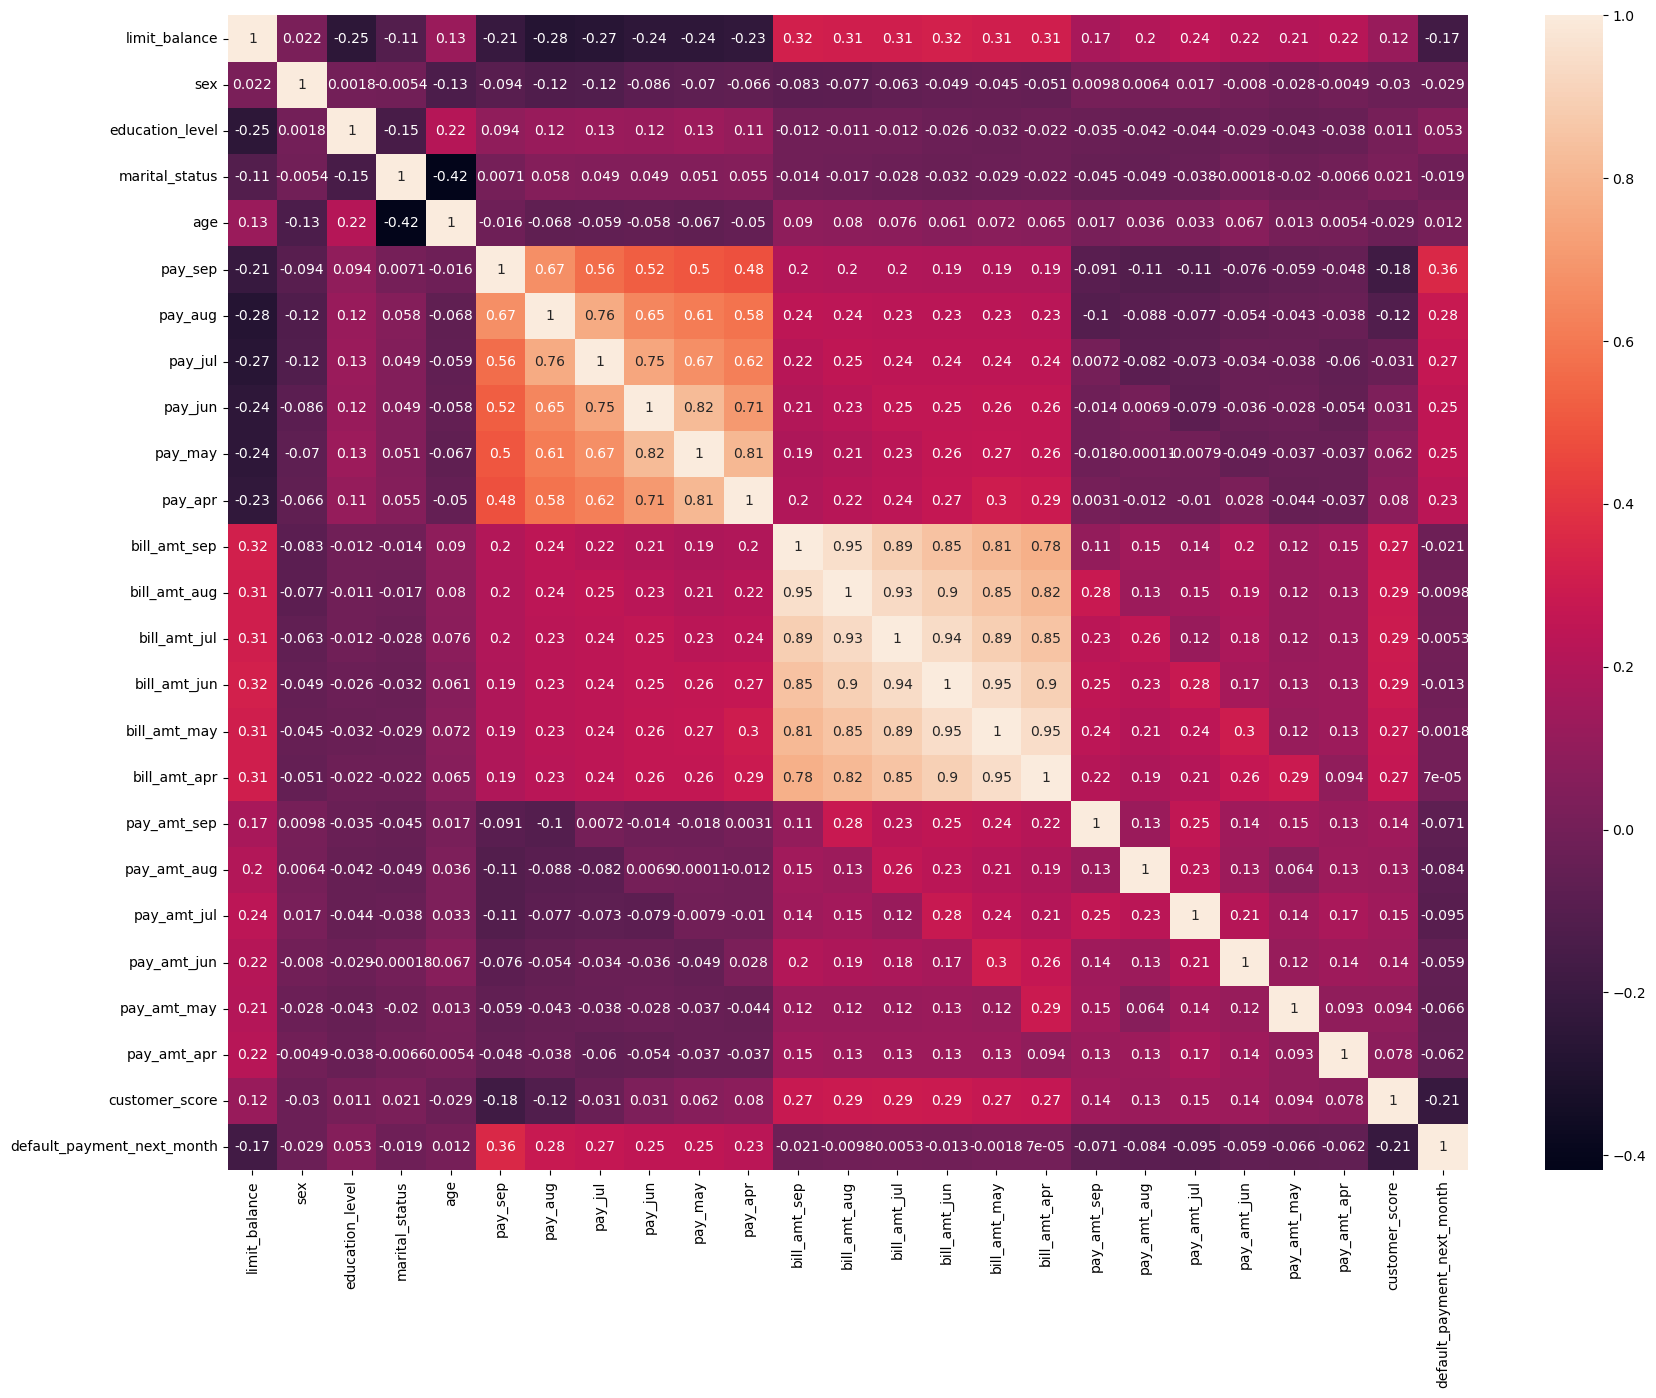

In [46]:
# cek korelasi fitur dan target
plt.figure(figsize=(20,15))
sns.heatmap(train_corr.corr(), annot=True)
plt.show()

Dari segala macam analisis, fitur-fitur yang dikira akan berpengaruh terhadap target sudah diurutkan dari mulai tertinggi hingga terrendah. Disini saya akan memilih 5 fitur saja yaitu pay_sep, age, bill_amt_sep, limit_balance, dan customer_score. Setelah saya tinjau kembali, saya merasa fitur pay kurang berguna. Karena untuk kolom pay, datanya hanya mendeskripsikan kriteria pembayaran nasabah apakah tepat waktu atau terlambat. Tidak logis jika ingin memprediksikan apakah customer akan masuk ke kategori default jika melihat data pay 2 bulan sebelumnya atau lebih sehingga dari argumen ini data pay yang dipilih hanya kolom pay_sep. Selanjutnya untuk kolom bill amount hanya dipilih bulan terakhir juga. Pemilihan ini berdasarkan observasi data saat bill amount mendekati limit maka untuk bulan depannya nasabah akan masuk ke kategori default di target. Selanjutnya adalah kolom customer_score yang memang sengaja dibuat sebagai representasi kebiasaan membayar nasabah yang dilihat dari pay_amt. 

In [47]:
# drop kolom non fitur
X_train.drop(['sex', 'education_level', 'marital_status', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 
              'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
              'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 
              'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr'], axis=1, inplace=True)
X_test.drop(['sex', 'education_level', 'marital_status', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 
             'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
              'bill_amt_may', 'bill_amt_apr','pay_amt_sep', 'pay_amt_aug', 
              'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr'], axis=1, inplace=True)

In [48]:
X_train.columns

Index(['limit_balance', 'age', 'pay_sep', 'bill_amt_sep', 'customer_score'], dtype='object')

Dari feature selection, fitur yang sekiranya tidak berpengaruh dan tidak logis akan di drop saja.

# Preprocessing

## Handling Missing Value

In [49]:
# cek Missing Values di X_train
X_train.isnull().sum()

limit_balance     0
age               0
pay_sep           0
bill_amt_sep      0
customer_score    0
dtype: int64

In [50]:
# cek Missing Values di X_test
X_test.isnull().sum()

limit_balance     0
age               0
pay_sep           0
bill_amt_sep      0
customer_score    0
dtype: int64

In [51]:
# cek Missing Values di y_train
y_train.isnull().sum()

0

In [52]:
# Check Missing Values on y_test
y_test.isnull().sum()

0

Setelah di cek missing value, terlihat datanya tidak ada missing value sehingga dapat dilanjutkan untuk handling outlier.

In [53]:
def plot_fitur(data, variable):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

     # histogram
    sns.histplot(data[variable],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{variable}'")
    axes[0].axvline(data[variable].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(data[variable].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()


     # boxplot
    sns.boxplot(y=data[variable], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{variable}'")

    plt.show()

    # skewness
    print(data[variable].name + ' Kurtosis: ' + str(data[variable].kurt()))
    print(data[variable].name + ' Skewness: ' + str(data[variable].skew()))
    if -0.5 <= data[variable].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(variable))
    elif data[variable].skew() > 0.5:
        print("Columns '{}' right skewed".format(variable))
    elif data[variable].skew() < -0.5:
        print("Columns '{}' left skewed".format(variable))

    print(data[variable].mean())
    print(data[variable].median())
    print(data[variable].mode())

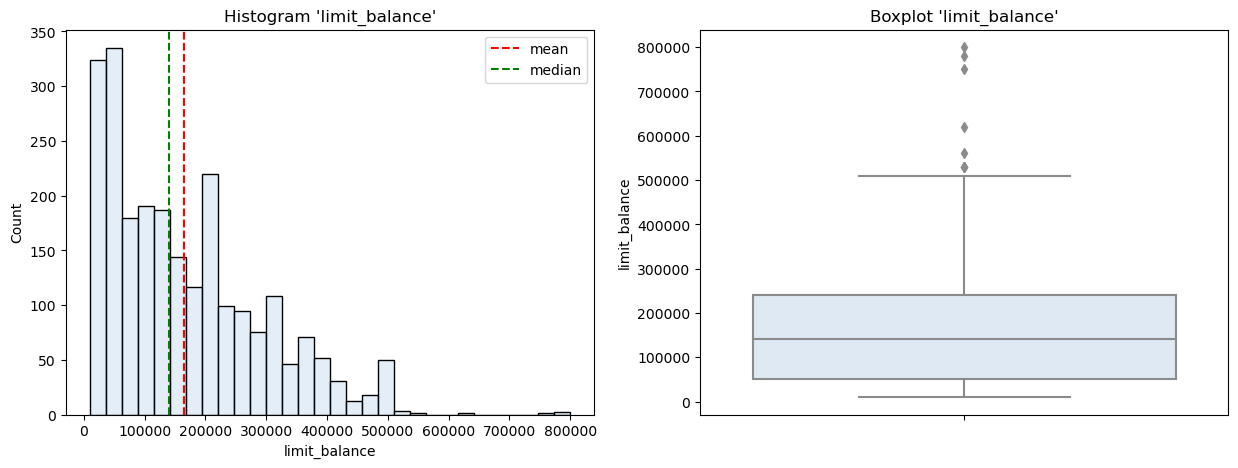

limit_balance Kurtosis: 0.5376701109870874
limit_balance Skewness: 0.9451719468620617
Columns 'limit_balance' right skewed
165120.60939483708
140000.0
0    50000.0
Name: limit_balance, dtype: float64


In [54]:
plot_fitur(X_train, 'limit_balance')

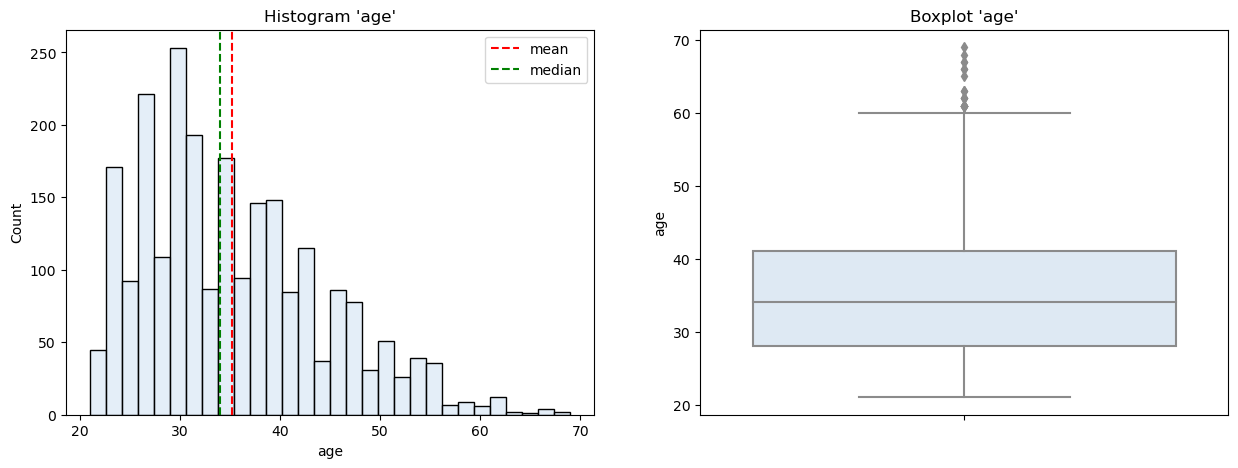

age Kurtosis: 0.04637780222389232
age Skewness: 0.7455142710206784
Columns 'age' right skewed
35.20059246720271
34.0
0    30
Name: age, dtype: int32


In [55]:
plot_fitur(X_train, 'age')

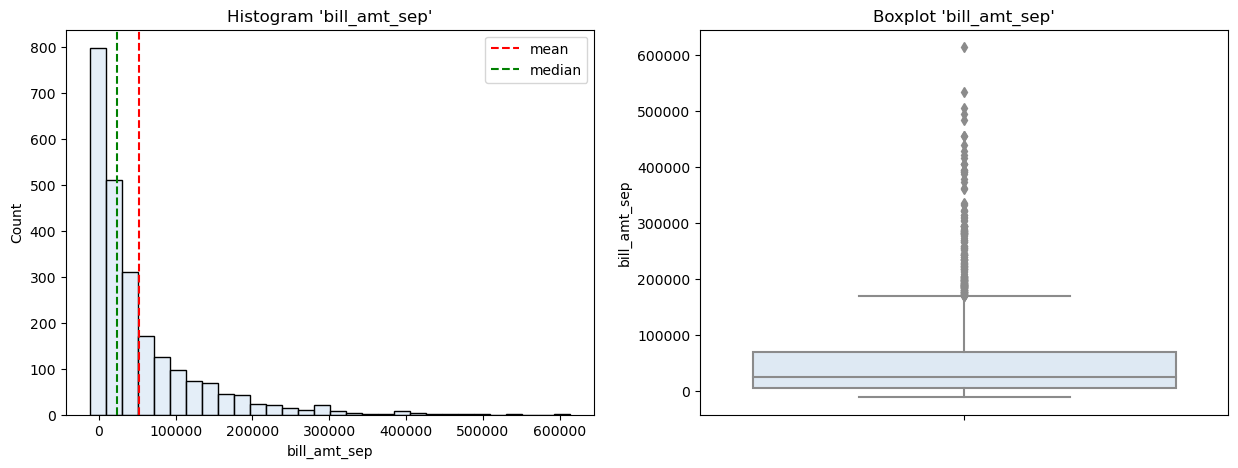

bill_amt_sep Kurtosis: 8.12648667490829
bill_amt_sep Skewness: 2.5005675120955124
Columns 'bill_amt_sep' right skewed
52981.239949217095
24257.0
0    0.0
Name: bill_amt_sep, dtype: float64


In [56]:
plot_fitur(X_train, 'bill_amt_sep')

Terlihat disemua kolom yang bersifat numerik memiliki outlier. Untuk handling outlier disini akan digunakan metode capping sesuai range iqr 1.5.

In [57]:
# Deteksi outlier limit_balance dengan IQR
Q3 = X_train['limit_balance'].quantile(.75)
Q1 = X_train['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = X_train[(X_train['limit_balance'] > upper) | (X_train['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  8
percentage of outlier:  0.33855268726195514 %


In [58]:
# Deteksi outlier bill_amt_sep dengan IQR
Q3 = X_train['bill_amt_sep'].quantile(.75)
Q1 = X_train['bill_amt_sep'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = X_train[(X_train['bill_amt_sep'] > upper) | (X_train['bill_amt_sep'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  65
percentage of outlier:  2.750740584003385 %


In [59]:
# Deteksi outlier age dengan IQR
Q3 = X_train['age'].quantile(.75)
Q1 = X_train['age'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = X_train[(X_train['age'] > upper) | (X_train['age'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/X_train.shape[0] * 100, '%')

count of outlier:  21
percentage of outlier:  0.8887008040626322 %


In [60]:
# hitung outlier dengan capping sesuai range iqr
wins1 = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['limit_balance','age'])
wins1.fit(X_train)
X_train_cleaned = wins1.transform(X_train) 
     

In [61]:
# hitung outlier dengan capping sesuai range iqr
wins2 = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['bill_amt_sep'])
wins2.fit(X_train)
X_train_cleaned = wins2.transform(X_train) 

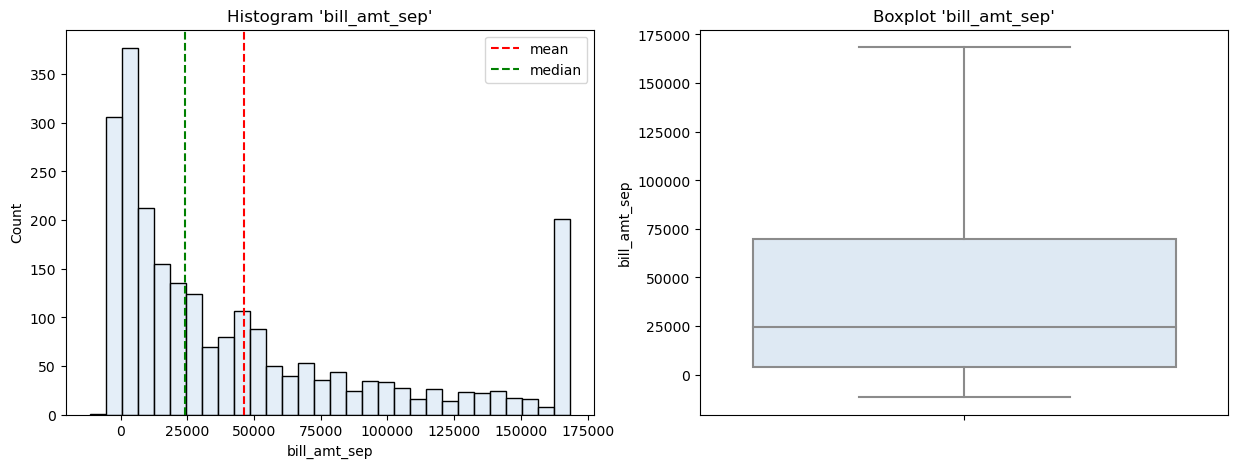

bill_amt_sep Kurtosis: 0.17428834952832029
bill_amt_sep Skewness: 1.1895385271736676
Columns 'bill_amt_sep' right skewed
46338.787663986455
24257.0
0    168520.75
Name: bill_amt_sep, dtype: float64


In [62]:
plot_fitur(X_train_cleaned, 'bill_amt_sep')

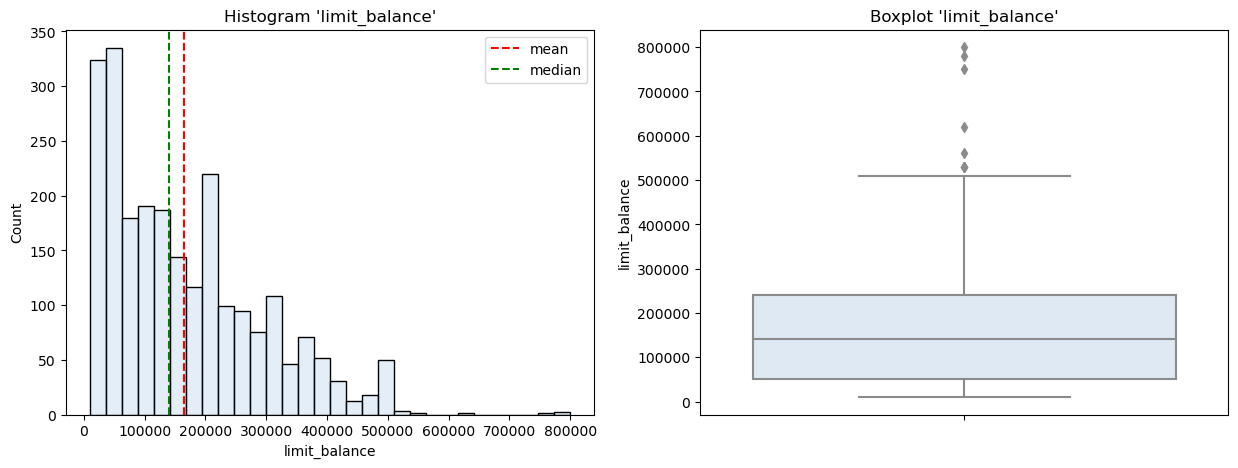

limit_balance Kurtosis: 0.5376701109870874
limit_balance Skewness: 0.9451719468620617
Columns 'limit_balance' right skewed
165120.60939483708
140000.0
0    50000.0
Name: limit_balance, dtype: float64


In [63]:
plot_fitur(X_train_cleaned, 'limit_balance')

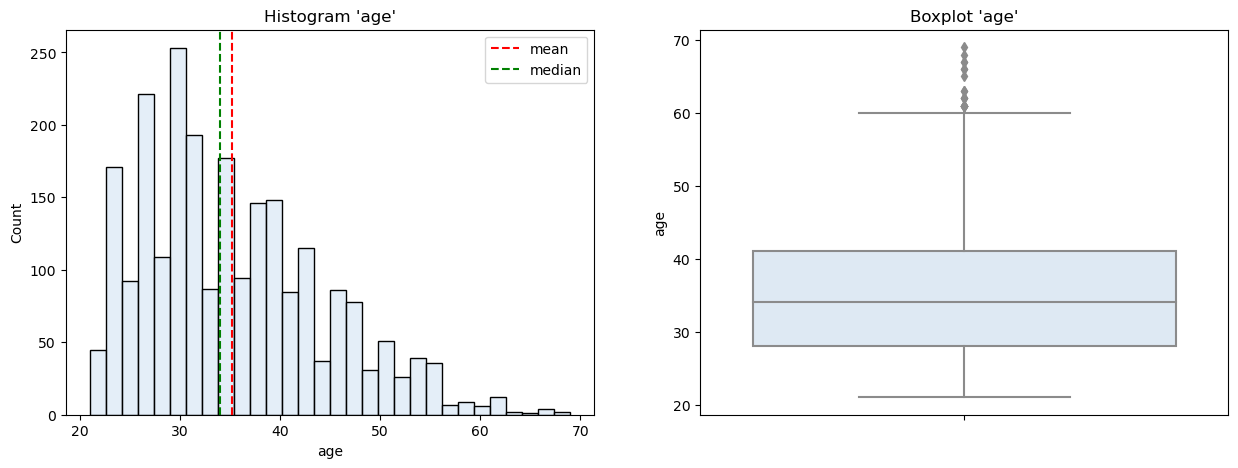

age Kurtosis: 0.04637780222389232
age Skewness: 0.7455142710206784
Columns 'age' right skewed
35.20059246720271
34.0
0    30
Name: age, dtype: int32


In [64]:
plot_fitur(X_train_cleaned, 'age')

Terlihat perbedaan data dari visualisasinya terutama pada boxplot. Setelah dihandle outliernya, semua outlier tidak terdeteksi kembali karena datanya sudah diubah/ditarik ke batas atas dan bawah sesuai range capping.

In [65]:
X_train_cleaned

,limit_balance,age,pay_sep,bill_amt_sep,customer_score
673,70000.0,26,0.0,41659.0,6
2366,120000.0,36,-1.0,396.0,6
1786,30000.0,25,0.0,26769.0,3
149,20000.0,22,0.0,28758.0,4
1053,20000.0,22,1.0,19512.0,0
...,...,...,...,...,...
600,260000.0,32,0.0,106093.0,6
451,60000.0,44,0.0,59331.0,6
2325,230000.0,32,1.0,328.0,6
1644,50000.0,23,-1.0,3237.0,6


## Pipeline Definition

Setelah data train dibersihkan selanjutnya akan dipisah kolom kategorik dan numerik nya untuk memudahkan pipeline.

In [66]:
# pisah numerik dan kategorik
num_col15 = ['limit_balance','age']
num_col3 = ['bill_amt_sep']
cat_col = ['pay_sep','customer_score']

In [67]:
num_pipeline1 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])

num_tr1 = num_pipeline1.fit_transform(X_train[['limit_balance','age']])
num_tr1

array([[0.11650485, 0.12658228],
       [0.21359223, 0.37974684],
       [0.03883495, 0.10126582],
       ...,
       [0.42718447, 0.27848101],
       [0.0776699 , 0.05063291],
       [0.23300971, 0.35443038]])

In [68]:
num_pipeline2 = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', MinMaxScaler())
    ])

num_tr2 = num_pipeline2.fit_transform(X_train[['bill_amt_sep']])
num_tr2

array([[0.19089205],
       [0.04284343],
       [0.13746782],
       ...,
       [0.04259945],
       [0.05303673],
       [0.50750146]])

In [69]:
# ordinal encoding
ps_cat = [8, 7, 6, 5, 4, 3, 2, 1, -1, 0, 2]
cs_cat = [0, 1, 2, 3, 4, 5, 6]

ord_enc = OrdinalEncoder(categories=[ps_cat, cs_cat])

In [70]:
# mengganti datatype agar bisa di encoding
class DataTypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, columns, dtype=object):
        self.columns = columns
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].astype(self.dtype)
        return X_copy


cat_pipeline = Pipeline([
    ('data_converter', DataTypeConverter(columns=['pay_sep', 'customer_score'], dtype=object)),
    ('ord_enc', OrdinalEncoder(categories=[[8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, -1.0, 0.0, -2.0],
                                           [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]])),
])

cat_tr1 = cat_pipeline.fit_transform(X_train[['pay_sep', 'customer_score']])


In [71]:
# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("numerik15", num_pipeline1, num_col15),
        ("numerik3", num_pipeline2, num_col3),
        ("kategorik", cat_pipeline, cat_col)])

# Model Definition

## Model Definition Logistic Regression

In [72]:
# logistic regression
logpipe = Pipeline([("preprocess",preprocessor), ("LogReg",LogisticRegression(random_state= 69))])

In [73]:
# cross validation logistic regression
kfold = KFold(n_splits=10)
scoreLR_train = cross_val_score(logpipe, X_train, y_train, scoring="recall", cv = kfold)

print("Cross Validation array       :",scoreLR_train)
print("Cross Validation score       :",scoreLR_train.mean())
print("Std Dev Cross Validation     :",scoreLR_train.std())

Cross Validation array       : [0.43902439 0.36       0.21153846 0.23636364 0.27272727 0.32653061
 0.25       0.36734694 0.39622642 0.32608696]
Cross Validation score       : 0.31858446835097604
Std Dev Cross Validation     : 0.07054950352166599


## Model Definition SVM

In [74]:
# svm
svcpipe = Pipeline([("preprocess", preprocessor), ("svm", SVC(random_state= 69))])

In [75]:
# cross validation svm
kfold = KFold(n_splits=10)
scoreSVC_train = cross_val_score(svcpipe, X_train, y_train,scoring="recall", cv = kfold)

print("Cross Validation array       :",scoreSVC_train)
print("Cross Validation score       :",scoreSVC_train.mean())
print("Std Dev Cross Validation     :",scoreSVC_train.std())

Cross Validation array       : [0.41463415 0.32       0.28846154 0.25454545 0.18181818 0.36734694
 0.39285714 0.34693878 0.41509434 0.39130435]
Cross Validation score       : 0.33730008657582233
Std Dev Cross Validation     : 0.07262142631569028


## Model Definition Decision Tree

In [76]:
# decision tree
dtpipe = Pipeline([("preprocess", preprocessor), ("dt", DecisionTreeClassifier(random_state= 69))])

In [77]:
# cross validation decision tree
kf=KFold(n_splits=10)
scoreDT_train = cross_val_score(dtpipe, X_train, y_train,scoring="recall", cv=kf)

print("Cross Validation array           :",scoreDT_train)
print("Cross Validation score           :",scoreDT_train.mean())
print("Std Dev Cross Validation         :",scoreDT_train.std())

Cross Validation array           : [0.3902439  0.44       0.44230769 0.34545455 0.30909091 0.44897959
 0.375      0.42857143 0.41509434 0.60869565]
Cross Validation score           : 0.42034380614968897
Std Dev Cross Validation         : 0.0762942517330054


## Model Definition Random Forest

In [78]:
# random forest
rfpipe = Pipeline([("preprocess", preprocessor), ("rf", RandomForestClassifier(random_state= 69))])

In [79]:
# cross validation random forest
kf=KFold(n_splits=10)
scoreRF_train = cross_val_score(rfpipe, X_train, y_train,scoring = "recall", cv=kf)

print("Cross Validation array           :",scoreRF_train)
print("Cross Validation score           :",scoreRF_train.mean())
print("Std Dev Cross Validation         :",scoreRF_train.std())

Cross Validation array           : [0.3902439  0.42       0.26923077 0.25454545 0.23636364 0.42857143
 0.375      0.40816327 0.43396226 0.5       ]
Cross Validation score           : 0.3716080720607379
Std Dev Cross Validation         : 0.08374368188070225


## Model Definition KNN

In [80]:
# KNN
knnpipe = Pipeline([("preprocess",preprocessor), ("knn",KNeighborsClassifier())])

In [81]:
# cross validation knn
kf=KFold(n_splits=10)
scoreKNN_train = cross_val_score(knnpipe, X_train, y_train,scoring="recall", cv=kf)

print("Cross Validation array           :",scoreKNN_train)
print("Cross Validation score           :",scoreKNN_train.mean())
print("Std Dev Cross Validation         :",scoreKNN_train.std())

Cross Validation array           : [0.41463415 0.46       0.30769231 0.29090909 0.18181818 0.40816327
 0.41071429 0.36734694 0.43396226 0.47826087]
Cross Validation score           : 0.37535013502731235
Std Dev Cross Validation         : 0.08619089187119527


## Model Definition Naive Bayes

In [82]:
# Naive Bayes
nbpipe = Pipeline([("preprocess",preprocessor), ("nb",BernoulliNB())])

In [83]:
# cross validation naive bayes 
kf=KFold(n_splits=10)
scoreNB_train = cross_val_score(nbpipe, X_train, y_train,scoring="recall", cv=kf)

print("Cross Validation array           :",scoreNB_train)
print("Cross Validation score           :",scoreNB_train.mean())
print("Std Dev Cross Validation         :",scoreNB_train.std())

Cross Validation array           : [0.04878049 0.         0.01923077 0.         0.01818182 0.
 0.03571429 0.02040816 0.         0.        ]
Cross Validation score           : 0.014231552419705728
Std Dev Cross Validation         : 0.016572777308834972


## Model Definition AdaBoost

Algoritma lain untuk pemenuhan skor tugas adalah AdaBoost. Adaboost adalah algoritma lain dalam ensemble learning. Karena sudah memakai decision tree dan random forest, ada baiknya jika adaboost juga digunakan.

In [84]:
# adaboost
abpipe =Pipeline([("preprocess",preprocessor), ("ab",AdaBoostClassifier(DecisionTreeClassifier(random_state= 69)))])

In [85]:
# cross validation adaboost
kf=KFold(n_splits=10)
scoreAB_train = cross_val_score(abpipe, X_train, y_train,scoring="recall" ,cv=kf)

print("Cross Validation array           :",scoreAB_train)
print("Cross Validation score           :",scoreAB_train.mean())
print("Std Dev Cross Validation         :",scoreAB_train.std())

Cross Validation array           : [0.46341463 0.46       0.44230769 0.30909091 0.32727273 0.40816327
 0.35714286 0.46938776 0.45283019 0.52173913]
Cross Validation score           : 0.4211349159482718
Std Dev Cross Validation         : 0.0654428818180512


Dari berbagai baseline model yang dites menggunakan cross validation, SVC mendapat skor avg terbaik sebesar 46.3 diikuti oleh Logistic Regression sebesar 45.1. Oleh karena itu, model yang akan di hyperparameter tune adalah SVC. Saya juga menambahkan satu model lagi yang akan di tuning untuk membandingkan saja apakah hyperparameter tuning itu dibutuhkan atau tidak.

# Model Training

## Model Training Logistic Regression

In [86]:
# training logreg
modelLR = logpipe.fit(X_train,y_train)
modelLR


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('LogReg', LogisticRegression(random_state=69))])

## Model Training SVM

In [87]:
# sebelum tuning
modelSVC = svcpipe.fit(X_train,y_train)
modelSVC

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('svm', SVC(random_state=69))])

In [88]:
# estimator bebas
param_distributions = {
    'svm__kernel': ['rbf', 'linear'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 0.01],
    'svm__degree': [2, 3],
    'svm__coef0': [0]
}


In [89]:
random_searchsvc = RandomizedSearchCV(modelSVC, param_distributions, n_iter=10, scoring='f1')
random_searchsvc.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numerik15',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['limit_balance',
                                                                                'age']),
                                                                              ('numerik3',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]...
                                                                                                                           'customer_score'])),
                                                                                               ('ord_enc',
                                                                                                OrdinalEncoder(categories=[[8.0,
                                                                                                                            7.0,
                                                                                                                            6.0,
                                                                                                                            5.0,
                                                                                                                            4.0,
                                                                                                                            3.0,
                                                                                                                            2.0,
                                                                                                                            1.0,
                                                                                                                            -1.0,
                                                                                                                            0.0,
                                                                                                                            -2.0],
                                                                                                                           [0.0,
                                                                                                                            1.0,
                                                                                                                            2.0,
                                                                                                                            3.0,
                                                                                                          

In [90]:
# mencari best estimator
modelSVC_randomsearchCV = random_searchsvc.best_estimator_
modelSVC_randomsearchCV

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('svm',
                 SVC(C=10, coef0=0, degree=2, gamma=0.1, random_state=69))])

In [91]:
# cross validation setelah tuning
scores = cross_val_score(modelSVC_randomsearchCV, X_train, y_train,scoring='f1', cv=5)
print("Cross Validation Score modelSVC_randomsearchCV array   :",scores)
print("Cross Validation Score modelSVC_randomsearchCV         : {:.2f}".format(random_searchsvc.best_score_))
print("Std dev Cross Validation modelSVC_randomsearchCV       : {:.2f}".format(random_searchsvc.best_score_.std()))

Cross Validation Score modelSVC_randomsearchCV array   : [0.50666667 0.37681159 0.3943662  0.53793103 0.52229299]
Cross Validation Score modelSVC_randomsearchCV         : 0.47
Std dev Cross Validation modelSVC_randomsearchCV       : 0.00


## Model Training Decision Tree

In [92]:
# training dt
modelDT = dtpipe.fit(X_train,y_train)
modelDT

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('dt', DecisionTreeClassifier(random_state=69))])

## Model Training Random Forest

In [93]:
# training rf
modelRF = rfpipe.fit(X_train,y_train)
modelRF

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('rf', RandomForestClassifier(random_state=69))])

## Model Training KNN

In [94]:
# training knn
modelKNN = knnpipe.fit(X_train,y_train)
modelKNN
     

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('knn', KNeighborsClassifier())])

In [95]:
param_distributions = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

In [96]:
# perform random search
random_search = RandomizedSearchCV(knnpipe, param_distributions=param_distributions, n_iter=10, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numerik15',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['limit_balance',
                                                                                'age']),
                                                                              ('numerik3',
                                                                               Pipeline(steps=[('outlier',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           tail='both')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]...
                                                                                                DataTypeConverter(columns=['pay_sep',
                                                                                                                           'customer_score'])),
                                                                                               ('ord_enc',
                                                                                                OrdinalEncoder(categories=[[8.0,
                                                                                                                            7.0,
                                                                                                                            6.0,
                                                                                                                            5.0,
                                                                                                                            4.0,
                                                                                                                            3.0,
                                                                                                                            2.0,
                                                                                                                            1.0,
                                                                                                                            -1.0,
                                                                                                                            0.0,
                                                                                                                            -2.0],
                                                                                                                           [0.0,
                                                                                                                            1.0,
                                                                                                                            2.0,
                                                                                                     

In [97]:
# mencari best estimator
modelKNN_randomsearchCV = random_search.best_estimator_
modelKNN_randomsearchCV

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [98]:
# cross validation setelah tuning
scores = cross_val_score(modelKNN_randomsearchCV, X_train, y_train,scoring='f1', cv=5)
print("Cross Validation Score modelSVC_randomsearchCV array   :",scores)
print("Cross Validation Score modelSVC_randomsearchCV         : {:.2f}".format(random_search.best_score_))
print("Std dev Cross Validation modelSVC_randomsearchCV       : {:.2f}".format(random_search.best_score_.std()))

Cross Validation Score modelSVC_randomsearchCV array   : [0.5        0.36619718 0.40268456 0.50666667 0.5       ]
Cross Validation Score modelSVC_randomsearchCV         : 0.46
Std dev Cross Validation modelSVC_randomsearchCV       : 0.00


## Model Training Naive Bayes

In [99]:
# training nb
modelNB = nbpipe.fit(X_train,y_train)
modelNB
     

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('nb', BernoulliNB())])

## Model Training AdaBoost

In [100]:
# training ab
modelAB = abpipe.fit(X_train,y_train)
modelAB

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerik15',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age']),
                                                 ('numerik3',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bill_amt_sep']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('data_converter',
                                                                   DataTypeConverter(columns=['pay_sep',
                                                                                              'customer_score'])),
                                                                  ('ord_enc',
                                                                   OrdinalEncoder(categories=[[8.0,
                                                                                               7.0,
                                                                                               6.0,
                                                                                               5.0,
                                                                                               4.0,
                                                                                               3.0,
                                                                                               2.0,
                                                                                               1.0,
                                                                                               -1.0,
                                                                                               0.0,
                                                                                               -2.0],
                                                                                              [0.0,
                                                                                               1.0,
                                                                                               2.0,
                                                                                               3.0,
                                                                                               4.0,
                                                                                               5.0,
                                                                                               6.0]]))]),
                                                  ['pay_sep',
                                                   'customer_score'])])),
                ('ab',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=69)))])

# Model Evaluation

Untuk evaluasi model diperlukan visualisasi dan penjabaran hasil yang jelas. Berikut adalah uraiannya.

## Model Evaluation Logistic Regression

In [101]:
# performance logreg
y_pred_train_log = modelLR.predict(X_train)
y_pred_test_log = modelLR.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_log))
print('recall score test : ',recall_score(y_test,y_pred_test_log))

recall score train :  0.3221343873517787
recall score test :  0.3779527559055118


In [102]:
# classification report
print('classification report Logistic Regression Train Set')
print(classification_report(y_train,y_pred_train_log))
print('                                  ')
print('classification report Logistic Regression Test Set')
print(classification_report(y_test,y_pred_test_log))

classification report Logistic Regression Train Set
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1857
           1       0.68      0.32      0.44       506

    accuracy                           0.82      2363
   macro avg       0.76      0.64      0.67      2363
weighted avg       0.80      0.82      0.80      2363

                                  
classification report Logistic Regression Test Set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       464
           1       0.73      0.38      0.50       127

    accuracy                           0.84       591
   macro avg       0.79      0.67      0.70       591
weighted avg       0.82      0.84      0.81       591



## Model Evaluation SVM

In [103]:
# performance svm
y_pred_train_svm = modelSVC.predict(X_train)
y_pred_test_svm = modelSVC.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_svm))
print('recall score test : ',recall_score(y_test,y_pred_test_svm))

recall score train :  0.3359683794466403
recall score test :  0.3937007874015748


In [104]:
# performance svm randomsearch
y_pred_train_svm_randomsearchCV = modelSVC_randomsearchCV.predict(X_train)
y_pred_test_svm_randomsearchCV = modelSVC_randomsearchCV.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_svm_randomsearchCV))
print('recall score test : ',recall_score(y_test,y_pred_test_svm_randomsearchCV))

recall score train :  0.34189723320158105
recall score test :  0.4094488188976378


In [105]:
# classification report svm
print('classification report SVM Train Set')
print(classification_report(y_train,y_pred_train_svm))
print('                                  ')
print('classification report SVM Test Set')
print(classification_report(y_test,y_pred_test_svm))

classification report SVM Train Set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1857
           1       0.76      0.34      0.47       506

    accuracy                           0.83      2363
   macro avg       0.80      0.65      0.68      2363
weighted avg       0.82      0.83      0.81      2363

                                  
classification report SVM Test Set
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       464
           1       0.69      0.39      0.50       127

    accuracy                           0.83       591
   macro avg       0.77      0.67      0.70       591
weighted avg       0.82      0.83      0.81       591



In [106]:
# classification report svm randomsearch
print('classification report SVM Best Estimator RandomSearchCV Train Set')
print(classification_report(y_train,y_pred_train_svm_randomsearchCV))
print('                                  ')
print('classification report SVM Best Estimator RandomSearchCV Test Set')
print(classification_report(y_test,y_pred_test_svm_randomsearchCV))

classification report SVM Best Estimator RandomSearchCV Train Set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1857
           1       0.77      0.34      0.47       506

    accuracy                           0.84      2363
   macro avg       0.80      0.66      0.69      2363
weighted avg       0.83      0.84      0.81      2363

                                  
classification report SVM Best Estimator RandomSearchCV Test Set
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       464
           1       0.70      0.41      0.52       127

    accuracy                           0.84       591
   macro avg       0.78      0.68      0.71       591
weighted avg       0.82      0.84      0.82       591



Dari uraian ini terlihat untuk skor antara model yang belum di tuning dan model yang sudah di tuning memiliki behavior yang sama. Jika diperhatikan kembali, terlihat bahwa model cenderung memprediksi angka 0. Untuk angka 1 hanya di sekitar 30%. Namun dari sedikitnya angka 1 yang di input, tingkat akurasinya cukup tinggi yaitu berada di sekitar 70%. Mengacu dari angka recall, angkanya masih terlalu rendah. Sehingga bisa di simpulkan bahwa dari model ini masih memiliki False Negative yang banyak. Alasan kenapa hal ini terjadi akan dijelaskan di bagian kesimpulan.

## Model Evaluation Decision Tree

In [107]:
# performance decision tree
y_pred_train_DTC = modelDT.predict(X_train)
y_pred_test_DTC = modelDT.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_DTC))
print('recall score test : ',recall_score(y_test,y_pred_test_DTC))

recall score train :  0.9980237154150198
recall score test :  0.44881889763779526


confusion matrix Decision Tree Train Set


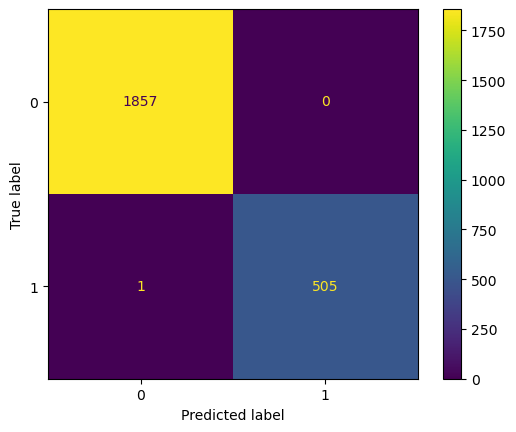

                                           
confusion matrix Decision Tree Test Set


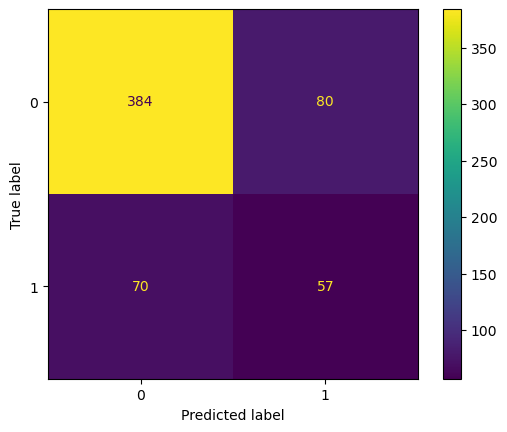

In [108]:
# Confusion Matrix Decision Tree
print('confusion matrix Decision Tree Train Set')
dt = confusion_matrix(y_train,y_pred_train_DTC, labels=modelDT.classes_)
dispdt = ConfusionMatrixDisplay(confusion_matrix=dt,display_labels=modelDT.classes_)
dispdt.plot()
plt.show()
print('                                           ')
print('confusion matrix Decision Tree Test Set')
dt2 = confusion_matrix(y_test,y_pred_test_DTC, labels=modelDT.classes_)
dispdt2 = ConfusionMatrixDisplay(confusion_matrix=dt2,display_labels=modelDT.classes_)
dispdt2.plot()
plt.show()

In [109]:
# classification report decision tree
print('classification report Decision Tree Train Set')
print(classification_report(y_train,y_pred_train_DTC))
print('                                  ')
print('classification report Decision Tree Test Set')
print(classification_report(y_test,y_pred_test_DTC))

classification report Decision Tree Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      1.00      1.00       506

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

                                  
classification report Decision Tree Test Set
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       464
           1       0.42      0.45      0.43       127

    accuracy                           0.75       591
   macro avg       0.63      0.64      0.63       591
weighted avg       0.75      0.75      0.75       591



Dari uraian ini terlihat untuk skor antara model yang belum di tuning dan model yang sudah di tuning memiliki behavior berbeda. Untuk model ini sangat overfit. Jika diperhatikan kembali, terlihat bahwa model cenderung memprediksi angka 0. Untuk angka 1 hanya di sekitar 45%. Akurasi nya dalam input angka 1 juga sangat buruk yaitu di 42%. Mengacu dari angka recall, angkanya masih terlalu rendah. Sehingga bisa di simpulkan bahwa dari model ini masih memiliki False Negative yang banyak. Alasan kenapa hal ini terjadi akan dijelaskan di bagian kesimpulan.

## Model Evaluation Random Forest

In [110]:
# performance random forest
y_pred_train_RFC = modelRF.predict(X_train)
y_pred_test_RFC = modelRF.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_RFC))
print('recall score test : ',recall_score(y_test,y_pred_test_RFC))

recall score train :  0.9980237154150198
recall score test :  0.41732283464566927


confusion matrix Random Forest Train Set


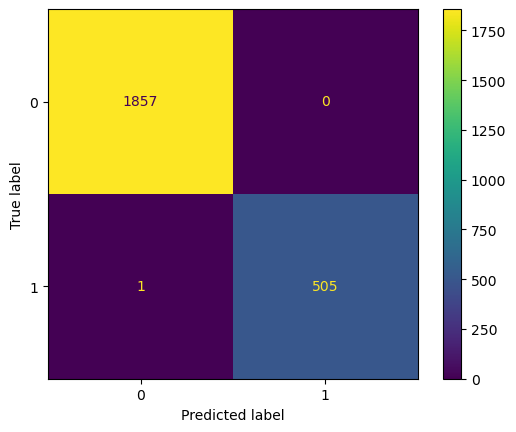

                                           
confusion matrix Random Forest Test Set


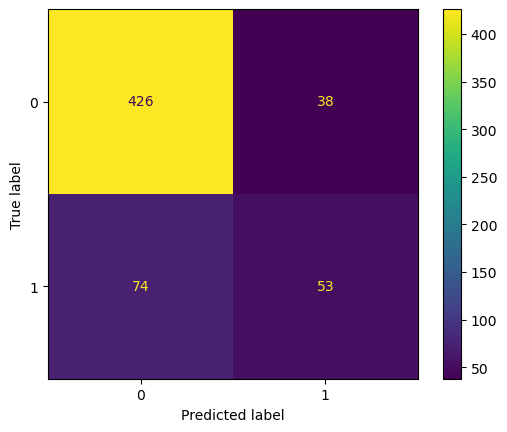

In [111]:
# confusion matrix random forest
print('confusion matrix Random Forest Train Set')
rf = confusion_matrix(y_train,y_pred_train_RFC, labels=modelRF.classes_)
disprf = ConfusionMatrixDisplay(confusion_matrix=rf,display_labels=modelRF.classes_)
disprf.plot()
plt.show()
print('                                           ')
print('confusion matrix Random Forest Test Set')
rf2 = confusion_matrix(y_test,y_pred_test_RFC, labels=modelRF.classes_)
disprf2 = ConfusionMatrixDisplay(confusion_matrix=rf2,display_labels=modelRF.classes_)
disprf2.plot()
plt.show()
     

In [112]:
# classification report random forest
print('classification report Random Forest Train Set')
print(classification_report(y_train,y_pred_train_RFC))
print('                                  ')
print('classification report Random Forest Test Set')
print(classification_report(y_test,y_pred_test_RFC))

classification report Random Forest Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      1.00      1.00       506

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

                                  
classification report Random Forest Test Set
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       464
           1       0.58      0.42      0.49       127

    accuracy                           0.81       591
   macro avg       0.72      0.67      0.69       591
weighted avg       0.79      0.81      0.80       591



Model ini juga terlalu overfit. Jika diperhatikan kembali, terlihat bahwa model cenderung memprediksi angka 0. Untuk angka 1 hanya di sekitar 42%. Akurasi input angka 0 juga rendah yaitu berada di sekitar 58%. Mengacu dari angka recall, angkanya masih terlalu rendah. Sehingga bisa di simpulkan bahwa dari model ini masih memiliki False Negative yang banyak. Alasan kenapa hal ini terjadi akan dijelaskan di bagian kesimpulan.

## Model Evaluation KNN

In [113]:
# performance knn
y_pred_train_KNN = modelKNN.predict(X_train)
y_pred_test_KNN = modelKNN.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_KNN))
print('recall score test : ',recall_score(y_test,y_pred_test_KNN))

recall score train :  0.46047430830039526


recall score test :  0.41732283464566927


In [114]:
# performance knn random search
y_pred_train_KNN_randomsearchCV = modelKNN_randomsearchCV.predict(X_train)
y_pred_test_KNN_randomsearchCV = modelKNN_randomsearchCV.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_KNN_randomsearchCV))
print('recall score test : ',recall_score(y_test,y_pred_test_KNN_randomsearchCV))

recall score train :  0.383399209486166
recall score test :  0.4330708661417323


confusion matrix KNN Train Set


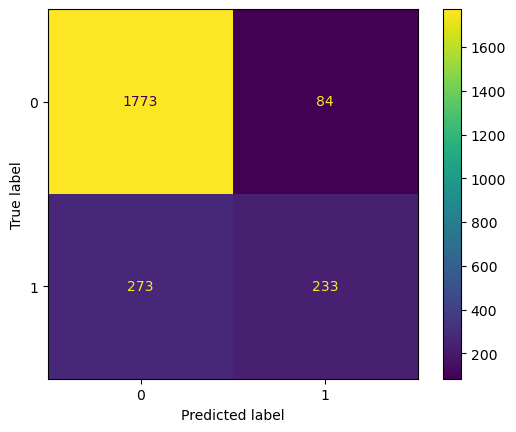

                                           
confusion matrix KNN Test Set


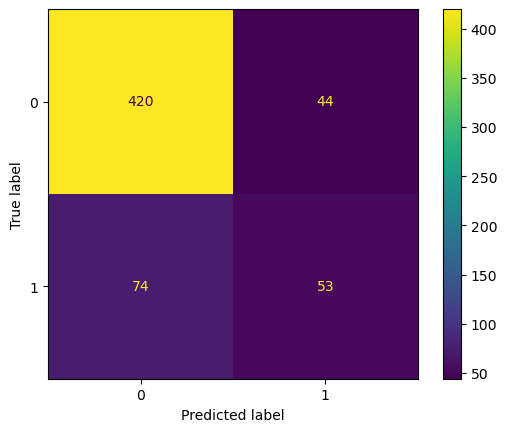

In [115]:
# confusion matrix knn
print('confusion matrix KNN Train Set')
knn = confusion_matrix(y_train,y_pred_train_KNN, labels=modelKNN.classes_)
dispknn = ConfusionMatrixDisplay(confusion_matrix=knn,display_labels=modelKNN.classes_)
dispknn.plot()
plt.show()
print('                                           ')
print('confusion matrix KNN Test Set')
knn2 = confusion_matrix(y_test,y_pred_test_KNN, labels=modelKNN.classes_)
dispknn2 = ConfusionMatrixDisplay(confusion_matrix=knn2,display_labels=modelKNN.classes_)
dispknn2.plot()
plt.show()

confusion matrix KNNRS Train Set


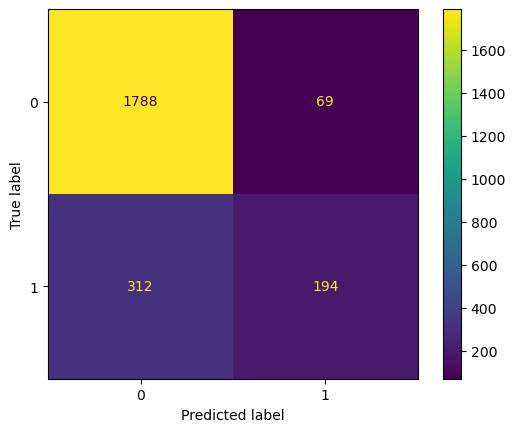

                                           
confusion matrix KNNRS Test Set


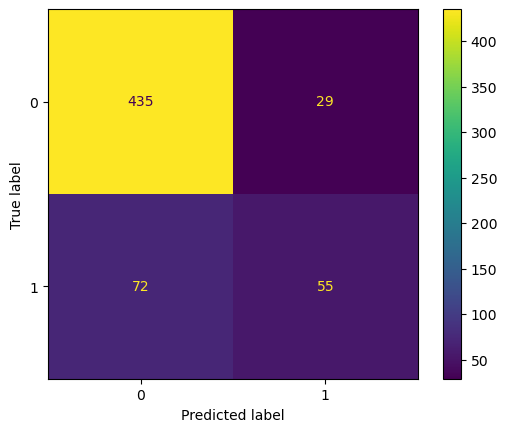

In [116]:
# confusion matrix knn random search
print('confusion matrix KNNRS Train Set')
knn3 = confusion_matrix(y_train,y_pred_train_KNN_randomsearchCV, labels=modelKNN_randomsearchCV.classes_)
dispknn3 = ConfusionMatrixDisplay(confusion_matrix=knn3,display_labels=modelKNN_randomsearchCV.classes_)
dispknn3.plot()
plt.show()
print('                                           ')
print('confusion matrix KNNRS Test Set')
knn4 = confusion_matrix(y_test,y_pred_test_KNN_randomsearchCV, labels=modelKNN_randomsearchCV.classes_)
dispknn4 = ConfusionMatrixDisplay(confusion_matrix=knn4,display_labels=modelKNN_randomsearchCV.classes_)
dispknn4.plot()
plt.show()

In [117]:
# classification report KNN
print('classification report K-Nearest Neighbor Train Set')
print(classification_report(y_train,y_pred_train_KNN))
print('                                  ')
print('classification report K-Nearest Neighbor Test Set')
print(classification_report(y_test,y_pred_test_KNN))

classification report K-Nearest Neighbor Train Set
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1857
           1       0.74      0.46      0.57       506

    accuracy                           0.85      2363
   macro avg       0.80      0.71      0.74      2363
weighted avg       0.84      0.85      0.84      2363

                                  
classification report K-Nearest Neighbor Test Set
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       464
           1       0.55      0.42      0.47       127

    accuracy                           0.80       591
   macro avg       0.70      0.66      0.68       591
weighted avg       0.78      0.80      0.79       591



In [118]:
# classification report KNN
print('classification report K-Nearest Neighbor Train Set')
print(classification_report(y_train,y_pred_train_KNN_randomsearchCV))
print('                                  ')
print('classification report K-Nearest Neighbor Test Set')
print(classification_report(y_test,y_pred_test_KNN_randomsearchCV))

classification report K-Nearest Neighbor Train Set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1857
           1       0.74      0.38      0.50       506

    accuracy                           0.84      2363
   macro avg       0.79      0.67      0.70      2363
weighted avg       0.83      0.84      0.82      2363

                                  
classification report K-Nearest Neighbor Test Set
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       464
           1       0.65      0.43      0.52       127

    accuracy                           0.83       591
   macro avg       0.76      0.69      0.71       591
weighted avg       0.81      0.83      0.82       591



Dari uraian ini terlihat untuk skor antara model yang belum di tuning dan model yang sudah di tuning memiliki behavior yang sama. Di train model sebelum tuning mendapat recall score 46% dan test nya 42%. Untuk di train model setelah tuning model mendapat recall score 38% dan trainnya 43%. Anehnya sebelum tuning model mengalami penurunan recall score antara train dan test nya. Namun ketika sudah di tuning, model mengalami kenaikan. Jarak perbedaannya hampir sama yaitu 5%. Model ini juga cukup best fit. Walaupun angkanya rendah. Mengacu dari angka recall, angkanya masih terlalu rendah. Sehingga bisa di simpulkan bahwa dari model ini masih memiliki False Negative yang banyak. Alasan kenapa hal ini terjadi akan dijelaskan di bagian kesimpulan.

## Model Evaluation Naive Bayes

In [119]:
# performance naive bayes
y_pred_train_NB = modelNB.predict(X_train)
y_pred_test_NB = modelNB.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_NB))
print('recall score test : ',recall_score(y_test,y_pred_test_NB))

recall score train :  0.01383399209486166
recall score test :  0.007874015748031496


confusion matrix Naive Bayes Train Set


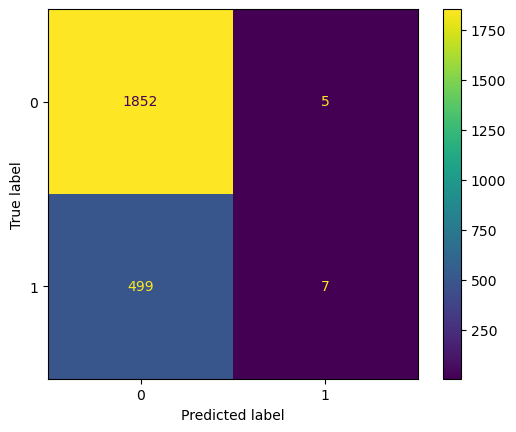

                                           
confusion matrix K-Nearest Neighbor Test Set


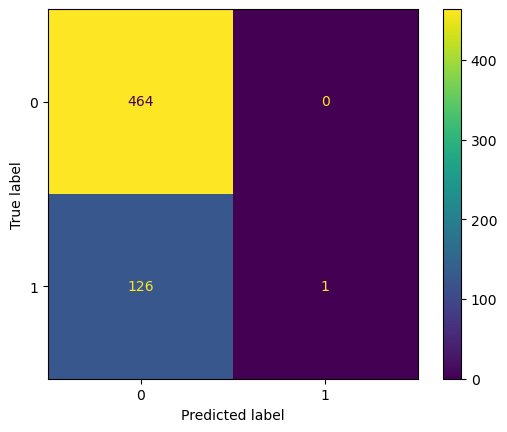

In [120]:
# Confusion Matrix naive bayes 
print('confusion matrix Naive Bayes Train Set')
nb = confusion_matrix(y_train,y_pred_train_NB, labels=modelNB.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix=nb,display_labels=modelNB.classes_)
dispnb.plot()
plt.show()
print('                                           ')
print('confusion matrix K-Nearest Neighbor Test Set')
nb = confusion_matrix(y_test,y_pred_test_NB, labels=modelNB.classes_)
dispknn2 = ConfusionMatrixDisplay(confusion_matrix=nb,display_labels=modelNB.classes_)
dispknn2.plot()
plt.show()

In [121]:
# classification report naive bayes
print('classification report Naive Bayes Train Set')
print(classification_report(y_train,y_pred_train_NB))
print('                                  ')
print('classification report Naive Bayes Test Set')
print(classification_report(y_test,y_pred_test_NB))
     

classification report Naive Bayes Train Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1857
           1       0.58      0.01      0.03       506

    accuracy                           0.79      2363
   macro avg       0.69      0.51      0.45      2363
weighted avg       0.74      0.79      0.70      2363

                                  
classification report Naive Bayes Test Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       464
           1       1.00      0.01      0.02       127

    accuracy                           0.79       591
   macro avg       0.89      0.50      0.45       591
weighted avg       0.83      0.79      0.69       591



Tidak perlu dijelaskan kembali. Model ini jelek. Sangat tidak sesuai untuk data ini. Model ini sedikit sekali prediksi angka 1. Walaupun semua ketika di test semua prediksi 1 nya benar.

## Model Evaluation AdaBoost

In [122]:
# AdaBoosting Model Accuracy Performance
y_pred_train_AB = modelAB.predict(X_train)
y_pred_test_AB = modelAB.predict(X_test)
print('recall score train : ',recall_score(y_train,y_pred_train_AB))
print('recall score test : ',recall_score(y_test,y_pred_test_AB))

recall score train :  0.9980237154150198
recall score test :  0.4409448818897638


confusion matrix AdaBoost Train Set


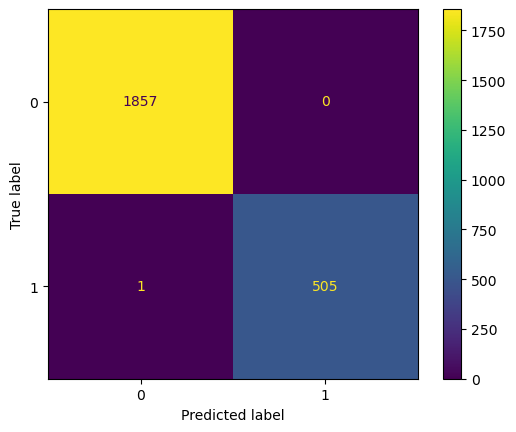

                                           
confusion matrix AdaBoost Test Set


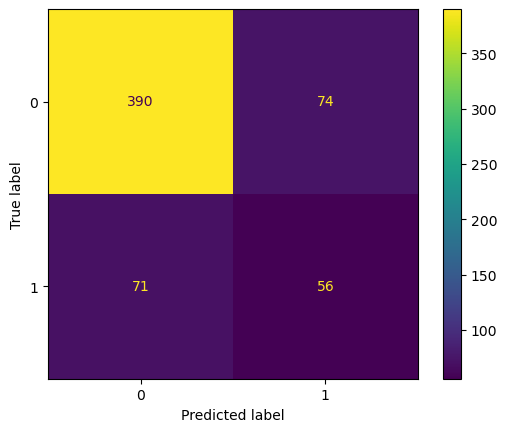

In [123]:
# Confusion Matrix AdaBoost
print('confusion matrix AdaBoost Train Set')
ab = confusion_matrix(y_train,y_pred_train_AB, labels=modelAB.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix=ab,display_labels=modelAB.classes_)
dispnb.plot()
plt.show()
print('                                           ')
print('confusion matrix AdaBoost Test Set')
ab2 = confusion_matrix(y_test,y_pred_test_AB, labels=modelAB.classes_)
dispab2 = ConfusionMatrixDisplay(confusion_matrix=ab2,display_labels=modelAB.classes_)
dispab2.plot()
plt.show()

In [124]:
# classification report AdaBoost
print('classification report AdaBoosting Train Set')
print(classification_report(y_train,y_pred_train_AB))
print('                                  ')
print('classification report AdaBoosting Test Set')
print(classification_report(y_test,y_pred_test_AB))

classification report AdaBoosting Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      1.00      1.00       506

    accuracy                           1.00      2363
   macro avg       1.00      1.00      1.00      2363
weighted avg       1.00      1.00      1.00      2363

                                  
classification report AdaBoosting Test Set
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       464
           1       0.43      0.44      0.44       127

    accuracy                           0.75       591
   macro avg       0.64      0.64      0.64       591
weighted avg       0.76      0.75      0.76       591



Dari hasil nya, AdaBoost cukup baik dalam prediksi kategori 0. Ini namun untuk ketepatan dalam prediksi angka 1 nya kurang baik. Hanya 43% prediksi kategori 1 nya yang benar.

# Inference

In [125]:
inf

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month,customer_score
0,70000.0,2,2,1,47,0.0,0.0,0.0,0.0,0.0,-2.0,136809.0,118811.0,52953.0,53696.0,11790.0,12045.0,3158.0,10000.0,2446.0,11790.0,430.0,423.0,0,6
1,150000.0,2,1,1,28,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,58322.0,36865.0,32311.0,12791.0,390.0,1508.0,36865.0,32311.0,12956.0,390.0,1508.0,2224.0,0,6
2,90000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,2.0,63426.0,57922.0,55010.0,52540.0,56236.0,40922.0,2700.0,2500.0,1900.0,4600.0,0.0,1600.0,1,4
3,80000.0,2,3,2,65,2.0,0.0,0.0,0.0,0.0,0.0,85882.0,84985.0,84247.0,81619.0,30095.0,20639.0,3900.0,4000.0,2048.0,1300.0,1700.0,401.0,0,6
4,260000.0,2,2,2,29,-2.0,-2.0,-1.0,0.0,0.0,-1.0,-5.0,-5.0,9571.0,7235.0,0.0,197.0,0.0,9576.0,29.0,0.0,197.0,568.0,0,0
5,20000.0,1,3,1,28,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,90000.0,2,2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,19204.0,12681.0,14155.0,14916.0,15673.0,17404.0,2000.0,2000.0,1000.0,1000.0,2000.0,2000.0,0,6
7,50000.0,1,2,1,42,0.0,0.0,0.0,0.0,0.0,2.0,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0,4
8,500000.0,1,2,1,40,0.0,0.0,0.0,0.0,0.0,-2.0,30415.0,31645.0,32556.0,36642.0,-8.0,-8.0,2006.0,3000.0,5080.0,8.0,0.0,0.0,0,4
9,310000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,0.0,304991.0,311243.0,306314.0,258610.0,246491.0,198889.0,13019.0,11128.0,8407.0,8599.0,6833.0,5987.0,1,6


In [126]:
inftest = inf[['limit_balance', 'age', 'pay_sep', 'bill_amt_sep', 'customer_score']]
inftest

,limit_balance,age,pay_sep,bill_amt_sep,customer_score
0,70000.0,47,0.0,136809.0,6
1,150000.0,28,0.0,58322.0,6
2,90000.0,35,2.0,63426.0,4
3,80000.0,65,2.0,85882.0,6
4,260000.0,29,-2.0,-5.0,0
5,20000.0,28,1.0,0.0,0
6,90000.0,23,0.0,19204.0,6
7,50000.0,42,0.0,35892.0,4
8,500000.0,40,0.0,30415.0,4
9,310000.0,35,2.0,304991.0,6


## Inference Logistic Regression

In [127]:
# logreg data inference
y_pred_inf_log_reg = modelLR.predict(inf)
y_pred_inf_log_reg_test = pd.DataFrame(y_pred_inf_log_reg, columns=['LogReg'])
y_pred_inf_log_reg_test 

,LogReg
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


## Inference SVM

In [128]:
# SVM data inference
y_pred_inf_svm = modelSVC.predict(inf)
y_pred_inf_svm_test = pd.DataFrame(y_pred_inf_svm, columns=['SVC'])
y_pred_inf_svm_test

,SVC
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,1


In [129]:
# HPSVM data inference
y_pred_inf_svm_randomsearchCV = modelSVC_randomsearchCV.predict(inf)
y_pred_inf_svm_randomsearchCV_test = pd.DataFrame(y_pred_inf_svm_randomsearchCV, columns=['SVCRS'])
y_pred_inf_svm_randomsearchCV_test 

,SVCRS
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,1


## Model Inference Decision Tree

In [130]:
# Decision Tree data inference
y_pred_inf_DT = modelDT.predict(inf)
y_pred_inf_DT_test = pd.DataFrame(y_pred_inf_DT, columns=['DT'])
y_pred_inf_DT_test

,DT
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,1


## Model Inference Random Forest

In [131]:
# Random Forest data inference
y_pred_inf_RF = modelRF.predict(inf)
y_pred_inf_RF_test = pd.DataFrame(y_pred_inf_RF, columns=['RF'])
y_pred_inf_RF_test 

,RF
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


## Model Inference KNN

In [132]:
# KNN data inference
y_pred_inf_KNN = modelKNN.predict(inf)
y_pred_inf_KNN_test = pd.DataFrame(y_pred_inf_KNN, columns=['KNN'])
y_pred_inf_KNN_test 

,KNN
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [133]:
# KNN random search data inference
y_pred_inf_KNNRS = modelKNN_randomsearchCV.predict(inf)
y_pred_inf_KNNRS_test = pd.DataFrame(y_pred_inf_KNN, columns=['KNNRS'])
y_pred_inf_KNNRS_test 

,KNNRS
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


## Model Inference Naive Bayes

In [134]:
# Naive Bayes data inference
y_pred_inf_NB = modelNB.predict(inf)
y_pred_inf_NB_test = pd.DataFrame(y_pred_inf_NB, columns=['NB'])
y_pred_inf_NB_test 

,NB
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Model Inference AdaBoost

In [135]:
# Predict using AdaBoosting for data inference
y_pred_inf_AB = modelAB.predict(inf)
y_pred_inf_AB_test = pd.DataFrame(y_pred_inf_AB, columns=['AB'])
y_pred_inf_AB_test 

,AB
0,0
1,0
2,1
3,0
4,0
5,1
6,0
7,0
8,0
9,1


In [136]:
# Merge/combine scaling/encoder data with its predicted rank
inf_final=inf[['limit_balance', 'age', 'pay_sep', 'bill_amt_sep', 'customer_score','default_payment_next_month']]
pd.concat([inf_final,y_pred_inf_log_reg_test,y_pred_inf_svm_test,y_pred_inf_svm_randomsearchCV_test,y_pred_inf_DT_test,y_pred_inf_RF_test,y_pred_inf_KNN_test,y_pred_inf_KNNRS_test,y_pred_inf_NB_test,y_pred_inf_AB_test], axis=1)


,limit_balance,age,pay_sep,bill_amt_sep,customer_score,default_payment_next_month,LogReg,SVC,SVCRS,DT,RF,KNN,KNNRS,NB,AB
0,70000.0,47,0.0,136809.0,6,0,0,0,0,0,0,0,0,0,0
1,150000.0,28,0.0,58322.0,6,0,0,0,0,0,0,0,0,0,0
2,90000.0,35,2.0,63426.0,4,1,1,1,1,1,1,1,1,0,1
3,80000.0,65,2.0,85882.0,6,0,1,1,1,0,1,1,1,0,0
4,260000.0,29,-2.0,-5.0,0,0,0,0,0,0,0,0,0,0,0
5,20000.0,28,1.0,0.0,0,0,0,0,0,0,1,1,1,0,1
6,90000.0,23,0.0,19204.0,6,0,0,0,0,0,0,0,0,0,0
7,50000.0,42,0.0,35892.0,4,0,0,0,0,0,0,0,0,0,0
8,500000.0,40,0.0,30415.0,4,0,0,0,0,0,0,0,0,0,0
9,310000.0,35,2.0,304991.0,6,1,0,1,1,1,1,1,1,0,1


In [137]:
inf

,limit_balance,sex,education_level,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_payment_next_month,customer_score
0,70000.0,2,2,1,47,0.0,0.0,0.0,0.0,0.0,-2.0,136809.0,118811.0,52953.0,53696.0,11790.0,12045.0,3158.0,10000.0,2446.0,11790.0,430.0,423.0,0,6
1,150000.0,2,1,1,28,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,58322.0,36865.0,32311.0,12791.0,390.0,1508.0,36865.0,32311.0,12956.0,390.0,1508.0,2224.0,0,6
2,90000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,2.0,63426.0,57922.0,55010.0,52540.0,56236.0,40922.0,2700.0,2500.0,1900.0,4600.0,0.0,1600.0,1,4
3,80000.0,2,3,2,65,2.0,0.0,0.0,0.0,0.0,0.0,85882.0,84985.0,84247.0,81619.0,30095.0,20639.0,3900.0,4000.0,2048.0,1300.0,1700.0,401.0,0,6
4,260000.0,2,2,2,29,-2.0,-2.0,-1.0,0.0,0.0,-1.0,-5.0,-5.0,9571.0,7235.0,0.0,197.0,0.0,9576.0,29.0,0.0,197.0,568.0,0,0
5,20000.0,1,3,1,28,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,90000.0,2,2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,19204.0,12681.0,14155.0,14916.0,15673.0,17404.0,2000.0,2000.0,1000.0,1000.0,2000.0,2000.0,0,6
7,50000.0,1,2,1,42,0.0,0.0,0.0,0.0,0.0,2.0,35892.0,32546.0,30660.0,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0,4
8,500000.0,1,2,1,40,0.0,0.0,0.0,0.0,0.0,-2.0,30415.0,31645.0,32556.0,36642.0,-8.0,-8.0,2006.0,3000.0,5080.0,8.0,0.0,0.0,0,4
9,310000.0,2,2,1,35,2.0,0.0,0.0,0.0,0.0,0.0,304991.0,311243.0,306314.0,258610.0,246491.0,198889.0,13019.0,11128.0,8407.0,8599.0,6833.0,5987.0,1,6


# Conclusion

Notebook ini memiliki tujuan untuk memprediksi apakah nasabah kartukredit akan di default bulan depan atau tidak. Dengan notebook ini, diharapkan dapat memberi insight lebih kepada bagian yang membutuhkan. Untuk kesimpulan dari notebook ini akan diberikan berdasarkan bagian-bagian besarnya.

Setelah eksplorasi data, terlihat beberapa visualisasi. `Ringkasan dari semua visualisasinya adalah, ada 78.6% nasabah yang tidak di default kartukreditnya pada bulan depan. Sisanya akan di default.` Ini adalah sumber masalah lain karena secara persentase, hal ini sangat merepotkan. Pada hal ini bank memang harus hati-hati dalam mencari calon nasabah. Perlu diimbangi target bagian Marketing dan bagian Collection. Jika satu bagian terlalu melebihi target, bagian lain yang akan jatuh. Karena banyak orang yang memang inginnya berhutang namun ketika dilakukan penagihan, mereka menolak. 

Untuk mitigasi hal ini saya juga memberi tolak ukur baru dimana saya menganalisa masing-masing nasabah berdasarkan kebiasaan membayarnya. Saya memberikan kategori tertentu untuk kebiasaan membayar tertentu. Saya membagi 6 kelas dari mulai angka 6 yang paling rajin membayar dan angka 1 yang jarang membayar. Untuk kategori 0 saya berasumsi bahwa ada nasabah yang memang tidak pernah memakai kartu kredit atau bahkan nasabah baru yang belum join layanan kita pada rentang bulan yang diteliti. Hal ini perlu diperdalam lagi secara data karena memang perlu dilakukan analisa tambahan mulai dari nominal dan domisili juga. `Sebagai business insight, data tambahan ini diharapkan menjadi acuan awal dalam seleksi nasabah atau proses penagihan. Untuk tim marketing dalam proses seleksi mungkin bisa berhati-hati jika calon nasabah berdomisili di  daerah tertentu, memiliki keuangan dalam tingkat tertentu, atau mungkin kedepannya bisa menganalisa hingga rinci. Untuk bagian penagihan mungkin bisa menggunakan data ini untuk memilih cara penagihan. Mungkin untuk kelas 6 tidak perlu dilakukan penagihan karena nantinya akan bayar sendiri dan untuk kelas 4 perlu di telfon supaya bisa membayar tagihan, dan untuk kelas 2 tidak perlu di telfon melainkan langsung ditemui saja di domisilinya.`

Untuk model, hampir semua algoritma model Machine Learning yang dipakai memiliki behavior yang sama. Dalam prediksi kategori `yes` semua model memiliki performa yang hampir sama. Tidak ada yang cukup baik untuk prediksi kategori 0. `Kemungkinan besar hal ini disebabkan karena imbalance data`. Untuk kategori 0 ada 78.6% dari data. Saat data training kemungkinan model terlalu banyak membaca kategori 0 sehingga model hanya terlatih untuk prediksi angka 0.

Sebagai evaluasi, untuk kedepannya bisa dilakukan improvement. Yang pertama harus dilakukan adalah menggunakan library tambahan seperti `SMOTENC` untuk cleaning data sebelum dibuat model supaya datanya balance. Karena mau bagaimana pun, selama ada data imbalance, model-model klasifikasi supervised tidak akan bisa memiliki hasil maksimal.



# Conceptual Problems

**Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !**

- Decision tree adalah algoritma yang cara kerjanya seperti pohon terbalik. Menjabarkan data mulai dari akar hingga ke pokok permasalahan.Terdapat beberapa criterion dari DT. Criterion bisa dianalogikan berada di titik percabangan. Criterion berguna untuk mengatur percabangan. Pada notebook ini criterion yang digunakan yang default yaitu gini impurity. Gini impurity mengukur apakah cabang yang dihasilkan saat ingin melakukan percabangan memiliki hasil yang benar-benar masuk kedalam kelas tertentu atau tidak. Range nya adalah 0-1 mulai dari yang paling pure(sangat berhubungan) sampai ke yang paling kotor(tidak berhubungan).

**Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !**

- Pruning yang berarti pemotongan berfungsi untuk memotong sebuah cabang dari tree. Pruning membuat pohon tidak terlalu kompleks dan klasifikasi hal-hal yang tidak dibutuhkan. Pruning membuat pohon menjadi lebih simpel supaya model tidak overfit. Pruning dibagi menjadi 2 yaitu post dan pre pruning. Perbedaan nya hanya kapan dilakukannya pruning. Untuk pre pruning dilakukan sebelum dilakukan implementasi model. Post pruning dilakukan setelah implementasi dan jika tidak puas terhadap model yang ada.

**Bagaimana cara memilih K yang optimal pada KNN ?**

- Untuk memilih K yang optimal ada beberapa cara. Tiga cara yang saya tahu adalah cross validation, trial and error, dan menggunakan plot hasil yang selanjutnya menggunakan Elbow method untuk mendapat hasil terbaik dimana dampak K sudah tidak signifikan lagi.  

**Jelaskan apa yang dimaksud dengan Cross Validation !**

- Cross validation adalah salah satu fungsi yang meminimalisir kekurangan validasi. Jika sebelumnya sebuah model sudah ada skor hasil, maka cross validation akan melakukan permodelan ulang terhadap data-data yang sekiranya belum pernah tersentuh oleh model. Teknisnya, cross validation membagi data menjadi jumlah yang ditentukan dan selanjutnya mencari skor dari masing-masing pembagian datanya. Selanjutnya skor di rata-ratakan.

**Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?**
- Accuracy adalah perbandingan prediksi yang benar. `Metrik ini mengukur kemampuan model untuk membuat prediksi yang tepat pada klasifikasinya.` Namun, akurasi bisa menyesatkan ketika ada `imbalance` kelas dalam kumpulan data.

- Recall (juga dikenal sebagai sensitivitas atau true positive rate) mengukur sejauh mana model dapat sepenuhnya mengidentifikasi semua contoh positif dalam kumpulan data. `Metrik ini berfokus pada true positive dan selanjutnya dibandingkan dengan keseluruhan data.`

- Precision mengukur sejauh mana prediksi positif yang dilakukan oleh model adalah benar. Metrik ini menghitung klasifikasi positif yang benar dan dibandingkan dengan semua data yang di prediksi positif.

- F1 Score menggabungkan precision dan recall untuk memberikan ukuran performa model yang seimbang. Skor F1 berguna ketika ada ketidakseimbangan antara kelas positif dan negatif dalam kumpulan data. Scoring ini dapat digunakan jika kita kedua kelas false positive dan false negative sama-sama penting.